In [33]:
%pip install -r requirements.txt
%pip install -q git+https://github.com/roboflow/sports.git

  Using cached tokenizers-0.21.4-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached tokenizers-0.21.4-cp39-abi3-win_amd64.whl (2.5 MB)

  Attempting uninstall: tokenizers

    Found existing installation: tokenizers 0.22.1

    Uninstalling tokenizers-0.22.1:

      Successfully uninstalled tokenizers-0.22.1

   ---------------------------------------- 2/2 [mplsports]

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.57.0 requires tokenizers<=0.23.0,>=0.22.0, but you have tokenizers 0.21.4 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.58.1 requires tokenizers<0.22.0,>=0.19.0, but you have tokenizers 0.22.1 which is incompatible.


In [48]:
import os
import gdown
import supervision as sv
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sports.common.view import ViewTransformer
from mplsports.pitch.tennis import TennisCourt
from tqdm import tqdm

In [ ]:
os.environ["HF_TOKEN"] = ""
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [4]:
# make sure folder exists
download_path = "examples/test_video"
os.makedirs(download_path, exist_ok=True)

# download sample video
file_ids = {
    "video1": "1-j3CWeGIBZRC5yUNoUcL_RhWuDy3eBx3",
    "video2": "1JWeHzX_P6tRySOXwkNq9UEd7ucCFZJio",
    "video3": "11hgurLu0kQIR_A3AbDuaK4o4L8AJ87e4",
    "video4": "11DhoxCLp-G9d-jcJ91RfnCQxSkOtUpo4",
    "video5": "1QKkjSzVSf9sHH51yxeEzIICM2NZJWHNt",
    "video6": "1joNYm3p04qmWfgcLlfQ01aPDgrkGZE60",
    "video7": "1eRz1KP6zfm9v3ew9S0L6oXjqerrTtOVB"
}

# Loop untuk download semua video
for name, file_id in file_ids.items():
    output = os.path.join(download_path, f"{name}.mp4")
    print(f"⬇️ Downloading {name} ...")
    gdown.download(id=file_id, output=output, quiet=False)
    print(f"✅ Saved to {output}\n")

⬇️ Downloading video1 ...


Downloading...
From (original): https://drive.google.com/uc?id=1-j3CWeGIBZRC5yUNoUcL_RhWuDy3eBx3
From (redirected): https://drive.google.com/uc?id=1-j3CWeGIBZRC5yUNoUcL_RhWuDy3eBx3&confirm=t&uuid=62d11d1b-7e3d-4411-9cf2-38a982203aa7
To: c:\Users\abiyamf\Documents\Bisnis Digital\TelU-Tubes-BisnisDigital-CourtPlay-AIDevelopment\Analytics\examples\test_video\video1.mp4
100%|██████████| 127M/127M [00:02<00:00, 45.4MB/s] 


✅ Saved to examples/test_video\video1.mp4

⬇️ Downloading video2 ...


Downloading...
From: https://drive.google.com/uc?id=1JWeHzX_P6tRySOXwkNq9UEd7ucCFZJio
To: c:\Users\abiyamf\Documents\Bisnis Digital\TelU-Tubes-BisnisDigital-CourtPlay-AIDevelopment\Analytics\examples\test_video\video2.mp4
100%|██████████| 83.5M/83.5M [00:01<00:00, 43.8MB/s]


✅ Saved to examples/test_video\video2.mp4

⬇️ Downloading video3 ...


Downloading...
From (original): https://drive.google.com/uc?id=11hgurLu0kQIR_A3AbDuaK4o4L8AJ87e4
From (redirected): https://drive.google.com/uc?id=11hgurLu0kQIR_A3AbDuaK4o4L8AJ87e4&confirm=t&uuid=30d4a3e6-4055-46d5-ab8f-719753df9787
To: c:\Users\abiyamf\Documents\Bisnis Digital\TelU-Tubes-BisnisDigital-CourtPlay-AIDevelopment\Analytics\examples\test_video\video3.mp4
100%|██████████| 270M/270M [00:04<00:00, 58.3MB/s] 


✅ Saved to examples/test_video\video3.mp4

⬇️ Downloading video4 ...


Downloading...
From (original): https://drive.google.com/uc?id=11DhoxCLp-G9d-jcJ91RfnCQxSkOtUpo4
From (redirected): https://drive.google.com/uc?id=11DhoxCLp-G9d-jcJ91RfnCQxSkOtUpo4&confirm=t&uuid=f5d02805-fb9d-4b25-8001-ec0e70a889e8
To: c:\Users\abiyamf\Documents\Bisnis Digital\TelU-Tubes-BisnisDigital-CourtPlay-AIDevelopment\Analytics\examples\test_video\video4.mp4
100%|██████████| 131M/131M [00:02<00:00, 45.8MB/s] 


✅ Saved to examples/test_video\video4.mp4

⬇️ Downloading video5 ...


Downloading...
From: https://drive.google.com/uc?id=1QKkjSzVSf9sHH51yxeEzIICM2NZJWHNt
To: c:\Users\abiyamf\Documents\Bisnis Digital\TelU-Tubes-BisnisDigital-CourtPlay-AIDevelopment\Analytics\examples\test_video\video5.mp4
100%|██████████| 102M/102M [00:02<00:00, 45.7MB/s] 


✅ Saved to examples/test_video\video5.mp4

⬇️ Downloading video6 ...


Downloading...
From (original): https://drive.google.com/uc?id=1joNYm3p04qmWfgcLlfQ01aPDgrkGZE60
From (redirected): https://drive.google.com/uc?id=1joNYm3p04qmWfgcLlfQ01aPDgrkGZE60&confirm=t&uuid=088492cc-15f6-4180-8510-47146d751812
To: c:\Users\abiyamf\Documents\Bisnis Digital\TelU-Tubes-BisnisDigital-CourtPlay-AIDevelopment\Analytics\examples\test_video\video6.mp4
100%|██████████| 113M/113M [00:02<00:00, 43.1MB/s] 


✅ Saved to examples/test_video\video6.mp4

⬇️ Downloading video7 ...


Downloading...
From (original): https://drive.google.com/uc?id=1eRz1KP6zfm9v3ew9S0L6oXjqerrTtOVB
From (redirected): https://drive.google.com/uc?id=1eRz1KP6zfm9v3ew9S0L6oXjqerrTtOVB&confirm=t&uuid=fbc12ae7-4a22-4e72-9d7e-c6a9f8a45482
To: c:\Users\abiyamf\Documents\Bisnis Digital\TelU-Tubes-BisnisDigital-CourtPlay-AIDevelopment\Analytics\examples\test_video\video7.mp4
100%|██████████| 129M/129M [00:02<00:00, 49.9MB/s] 

✅ Saved to examples/test_video\video7.mp4



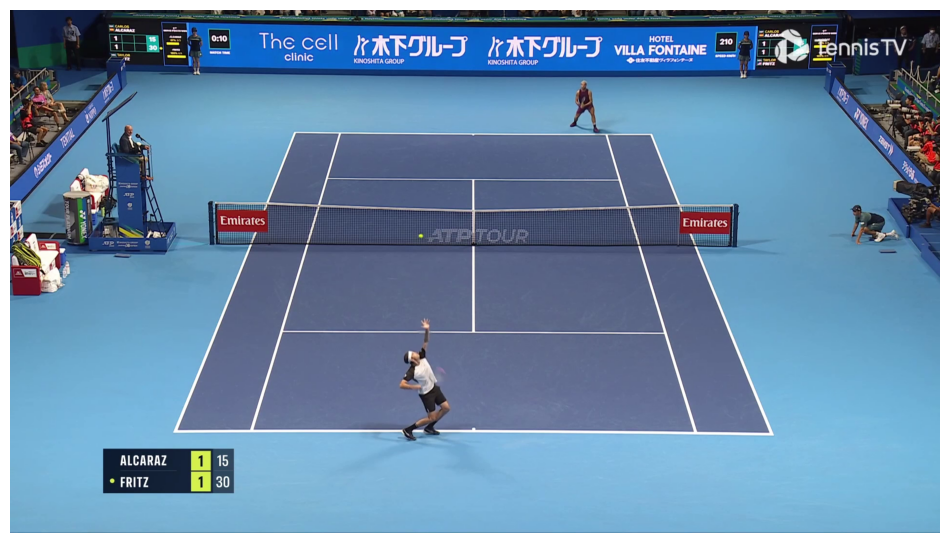

In [6]:
source_video_path = "examples/test_video/video1.mp4"

frame_generator = sv.get_video_frames_generator(source_video_path)
frame = next(frame_generator)

sv.plot_image(frame)


0: 416x736 1 ball, 2 players, 42.2ms
Speed: 3.5ms preprocess, 42.2ms inference, 38.5ms postprocess per image at shape (1, 3, 416, 736)


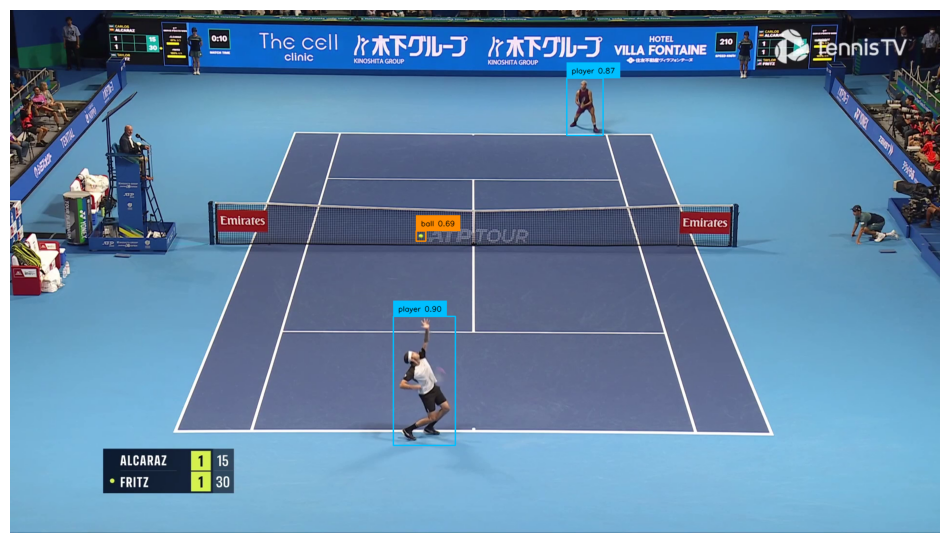

In [7]:
model = YOLO("models/objectDetections/best.pt")

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(source_video_path)
frame = next(frame_generator)

result = model(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)


0: 416x736 1 ball, 2 players, 35.8ms
Speed: 2.6ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


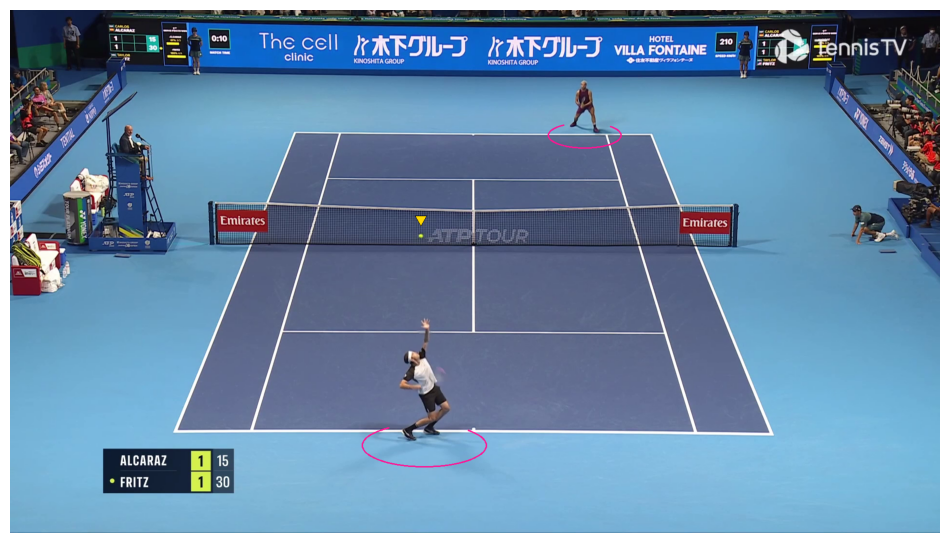

In [8]:
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

frame_generator = sv.get_video_frames_generator(source_video_path)
frame = next(frame_generator)

result = model(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

0: 416x736 1 ball, 2 players, 34.9ms
Speed: 1.9ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


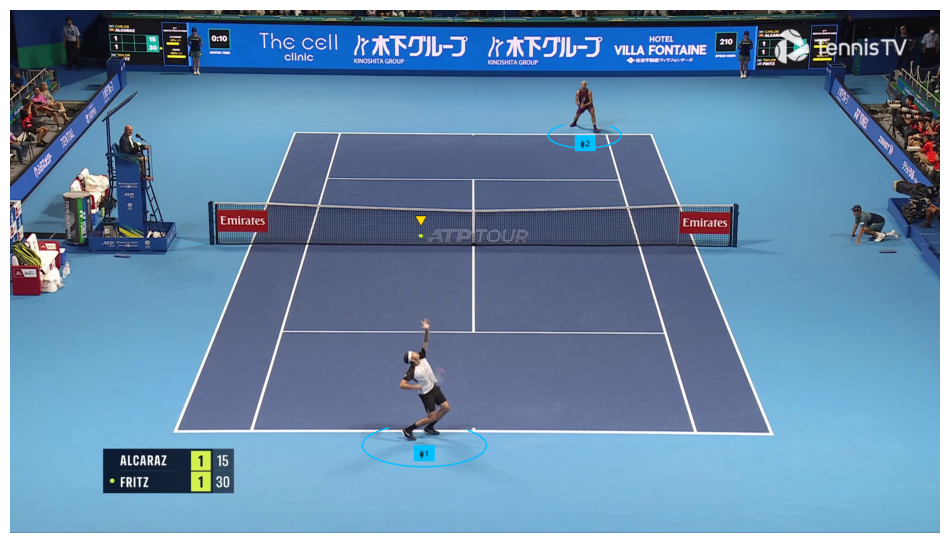

In [9]:
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(source_video_path)
frame = next(frame_generator)

result = model(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)


0: 416x736 1 ball, 2 players, 36.3ms
Speed: 1.5ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


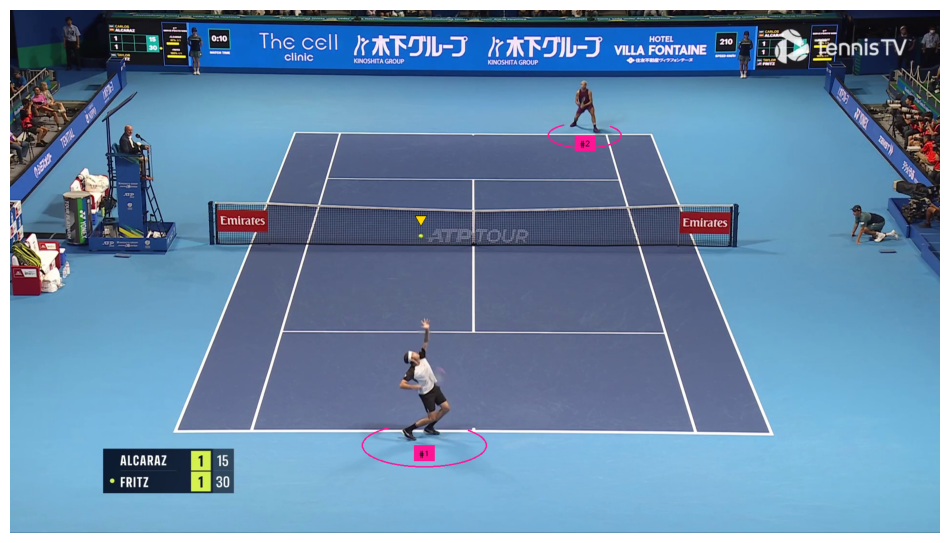

In [10]:
BALL_ID = 0
PLAYER_ID = 1

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(source_video_path)
frame = next(frame_generator)

result = model(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

players_detections = all_detections[all_detections.class_id == PLAYER_ID]


all_detections = sv.Detections.merge([
    players_detections])

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

all_detections.class_id = all_detections.class_id.astype(int)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)


0: 736x1280 1 tennis_court, 79.6ms
Speed: 4.2ms preprocess, 79.6ms inference, 21.9ms postprocess per image at shape (1, 3, 736, 1280)


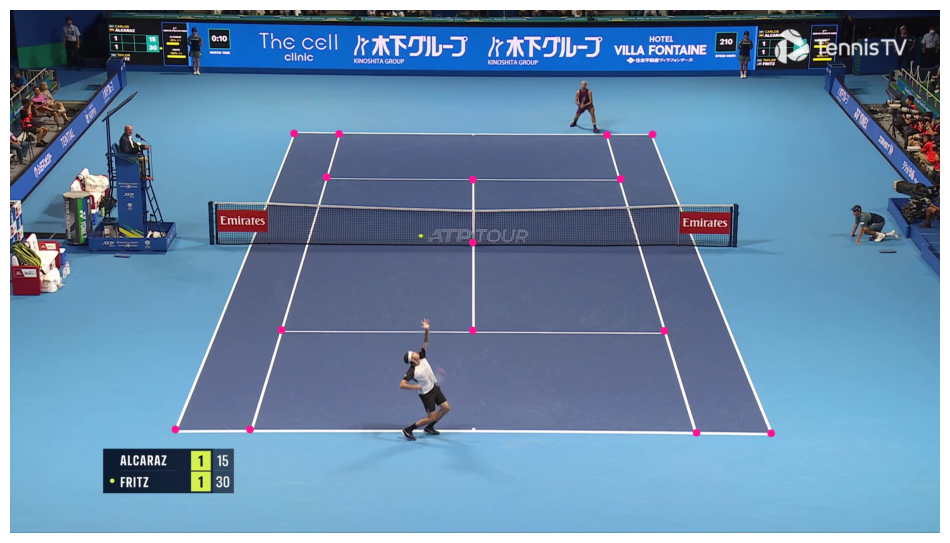

In [11]:
model_field = YOLO("models/keypoints/best.pt")

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(source_video_path)
frame = next(frame_generator)

result = model_field(frame, conf=0.3)[0]
key_points = sv.KeyPoints.from_ultralytics(result)

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

sv.plot_image(annotated_frame)


0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.8ms preprocess, 75.6ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)


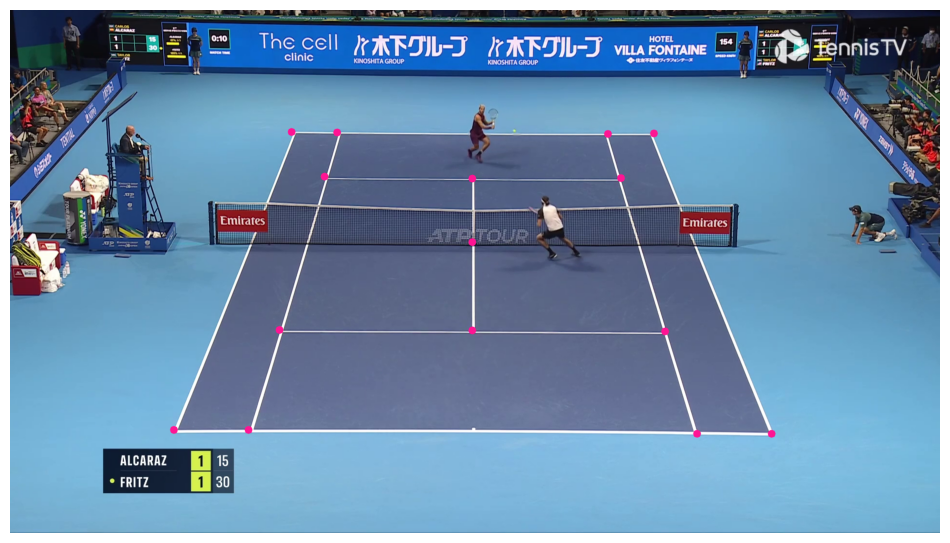

In [12]:
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(source_video_path, start=200)
frame = next(frame_generator)

result = model_field(frame, conf=0.3)[0]
key_points = sv.KeyPoints.from_ultralytics(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

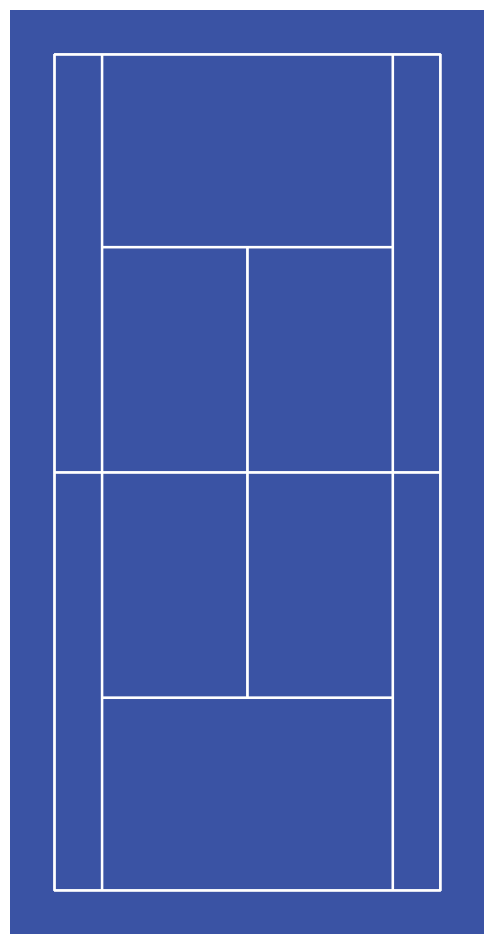

In [44]:
import importlib
import supervision as sv

# import modules (not functions/classes directly)
import config.tennis_court as tennis_court
import config.tennis_annotator as tennis_annotator

# Force reload to apply your recent edits
importlib.reload(tennis_court)
importlib.reload(tennis_annotator)

# now import the updated symbols from reloaded modules
CONFIG = tennis_court.TennisCourtConfiguration()
annotated = tennis_annotator.draw_court(CONFIG)
sv.plot_image(annotated)


0: 736x1280 1 tennis_court, 81.8ms
Speed: 4.9ms preprocess, 81.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


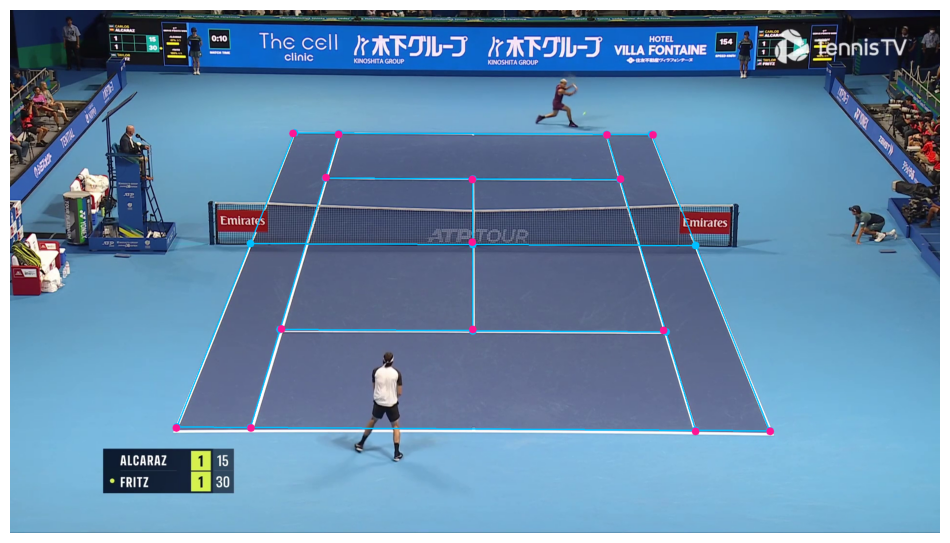

In [45]:
edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

frame_generator = sv.get_video_frames_generator(source_video_path, start=100)
frame = next(frame_generator)

result = model_field(frame, conf=0.3)[0]
key_points = sv.KeyPoints.from_ultralytics(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

# --- INI BAGIAN YANG DIPERBAIKI ---
# Gunakan .keypoints (15 titik) yang cocok dengan filter dari model Anda
pitch_reference_points = np.array(CONFIG.keypoints)[filter]

# Setelah `transformer` dibuat, ia bisa mentransformasi titik manapun
# dari bidang lapangan ke bidang gambar.
transformer = ViewTransformer(
    source=pitch_reference_points,
    target=frame_reference_points
)

# Untuk menggambar seluruh lapangan, kita tetap gunakan .vertices (17 titik)
# agar garis net yang utuh ikut tergambar.
pitch_all_points = np.array(CONFIG.vertices)
frame_all_points = transformer.transform_points(points=pitch_all_points)

frame_all_key_points = sv.KeyPoints(xy=frame_all_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator_2.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

In [50]:
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=source_video_path, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    result = model(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(result)
    players_detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

    players_detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

collecting crops: 0it [00:00, ?it/s]


0: 416x736 1 ball, 2 players, 208.1ms
Speed: 7.6ms preprocess, 208.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 1it [00:00,  3.81it/s]


0: 416x736 2 players, 37.7ms
Speed: 1.7ms preprocess, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 38.1ms
Speed: 1.7ms preprocess, 38.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 3it [00:00,  9.24it/s]


0: 416x736 2 players, 35.7ms
Speed: 2.3ms preprocess, 35.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 36.1ms
Speed: 1.6ms preprocess, 36.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 5it [00:00, 11.86it/s]


0: 416x736 1 ball, 2 players, 35.7ms
Speed: 2.0ms preprocess, 35.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 7it [00:00, 14.05it/s]


0: 416x736 2 players, 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 9it [00:00, 15.68it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 11it [00:00, 15.81it/s]


0: 416x736 2 balls, 2 players, 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 2 players, 33.1ms
Speed: 1.8ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 13it [00:00, 16.28it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 15it [00:01, 16.83it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 18it [00:01, 17.58it/s]


0: 416x736 1 ball, 2 players, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 20it [00:01, 17.75it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.8ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 22it [00:01, 17.22it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.8ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 33.3ms
Speed: 1.7ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 24it [00:01, 16.73it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 2.4ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 3 players, 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 26it [00:01, 16.02it/s]


0: 416x736 2 players, 32.9ms
Speed: 2.4ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 28it [00:01, 15.55it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 30it [00:01, 15.31it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 32it [00:02, 15.18it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 34it [00:02, 15.46it/s]


0: 416x736 2 players, 32.5ms
Speed: 2.0ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 36it [00:02, 15.76it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.7ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 38it [00:02, 15.71it/s]


0: 416x736 2 players, 32.7ms
Speed: 2.3ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 40it [00:02, 15.82it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 42it [00:02, 15.98it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 32.8ms
Speed: 2.4ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 44it [00:02, 16.16it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 46it [00:02, 16.96it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 32.9ms
Speed: 1.7ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 48it [00:03, 17.02it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 2.0ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 50it [00:03, 17.12it/s]


0: 416x736 1 ball, 2 players, 32.6ms
Speed: 1.7ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.8ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 52it [00:03, 17.18it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 54it [00:03, 17.31it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.7ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 56it [00:03, 17.36it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 players, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 58it [00:03, 17.01it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 2.4ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 60it [00:03, 17.15it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.8ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


collecting crops: 62it [00:03, 15.90it/s]


In [51]:
import cv2
from typing import Optional

def draw_pitch_voronoi_diagram_2(
    config: tennis_court.TennisCourtConfiguration(),
    team_1_xy: np.ndarray,
    team_2_xy: np.ndarray,
    team_1_color: sv.Color = sv.Color.RED,
    team_2_color: sv.Color = sv.Color.WHITE,
    opacity: float = 0.5,
    padding: int = 50,
    scale: float = 0.1,
    pitch: Optional[np.ndarray] = None
) -> np.ndarray:
    """
    Draws a Voronoi diagram on a soccer pitch representing the control areas of two
    teams with smooth color transitions.

    Args:
        config (SoccerPitchConfiguration): Configuration object containing the
            dimensions and layout of the pitch.
        team_1_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 1.
        team_2_xy (np.ndarray): Array of (x, y) coordinates representing the positions
            of players in team 2.
        team_1_color (sv.Color, optional): Color representing the control area of
            team 1. Defaults to sv.Color.RED.
        team_2_color (sv.Color, optional): Color representing the control area of
            team 2. Defaults to sv.Color.WHITE.
        opacity (float, optional): Opacity of the Voronoi diagram overlay.
            Defaults to 0.5.
        padding (int, optional): Padding around the pitch in pixels.
            Defaults to 50.
        scale (float, optional): Scaling factor for the pitch dimensions.
            Defaults to 0.1.
        pitch (Optional[np.ndarray], optional): Existing pitch image to draw the
            Voronoi diagram on. If None, a new pitch will be created. Defaults to None.

    Returns:
        np.ndarray: Image of the soccer pitch with the Voronoi diagram overlay.
    """
    if pitch is None:
        pitch = draw_pitch(
            config=config,
            padding=padding,
            scale=scale
        )

    scaled_width = int(config.width * scale)
    scaled_length = int(config.length * scale)

    voronoi = np.zeros_like(pitch, dtype=np.uint8)

    team_1_color_bgr = np.array(team_1_color.as_bgr(), dtype=np.uint8)
    team_2_color_bgr = np.array(team_2_color.as_bgr(), dtype=np.uint8)

    y_coordinates, x_coordinates = np.indices((
        scaled_width + 2 * padding,
        scaled_length + 2 * padding
    ))

    y_coordinates -= padding
    x_coordinates -= padding

    def calculate_distances(xy, x_coordinates, y_coordinates):
        return np.sqrt((xy[:, 0][:, None, None] * scale - x_coordinates) ** 2 +
                       (xy[:, 1][:, None, None] * scale - y_coordinates) ** 2)

    distances_team_1 = calculate_distances(team_1_xy, x_coordinates, y_coordinates)
    distances_team_2 = calculate_distances(team_2_xy, x_coordinates, y_coordinates)

    min_distances_team_1 = np.min(distances_team_1, axis=0)
    min_distances_team_2 = np.min(distances_team_2, axis=0)

    # Increase steepness of the blend effect
    steepness = 15  # Increased steepness for sharper transition
    distance_ratio = min_distances_team_2 / np.clip(min_distances_team_1 + min_distances_team_2, a_min=1e-5, a_max=None)
    blend_factor = np.tanh((distance_ratio - 0.5) * steepness) * 0.5 + 0.5

    # Create the smooth color transition
    for c in range(3):  # Iterate over the B, G, R channels
        voronoi[:, :, c] = (blend_factor * team_1_color_bgr[c] +
                            (1 - blend_factor) * team_2_color_bgr[c]).astype(np.uint8)

    overlay = cv2.addWeighted(voronoi, opacity, pitch, 1 - opacity, 0)

    return overlay


0: 416x736 1 ball, 2 players, 219.9ms
Speed: 5.3ms preprocess, 219.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


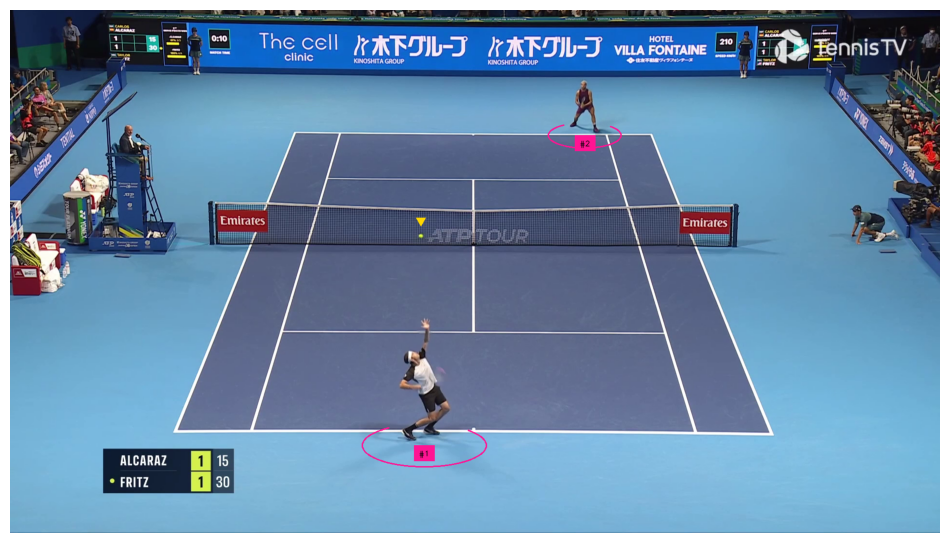


0: 736x1280 1 tennis_court, 88.3ms
Speed: 4.3ms preprocess, 88.3ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)
Membuat visualisasi radar view...


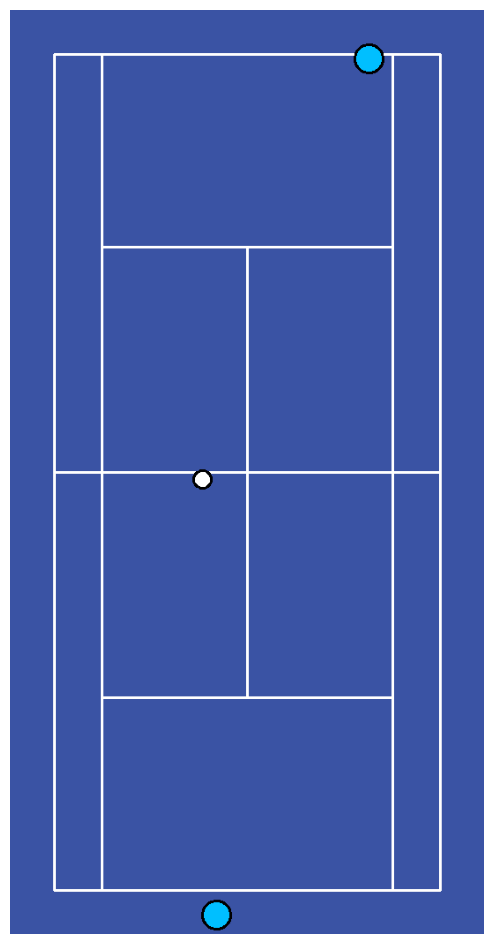

In [56]:
# --- PERBAIKAN 1: GANTI IMPOR ---
# Impor fungsi dari file annotater.py yang sudah kita buat untuk tenis
from config.tennis_annotator import (
    draw_court,
    draw_points_on_court
    # Jika Anda memerlukan diagram voronoi, pastikan ada fungsi
    # draw_court_voronoi_diagram di file annotater.py Anda
)

# Asumsi semua variabel (model, model_field, CONFIG, source_video_path) sudah ada

BALL_ID = 0
PLAYER_ID = 1

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(source_video_path)
frame = next(frame_generator)

# Deteksi objek
result = model(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

players_detections = all_detections[all_detections.class_id == PLAYER_ID]

# (Asumsi logika team assignment ada di sini jika diperlukan)
# Untuk sementara, kita anggap semua pemain adalah satu tim untuk menghindari error
# karena pada kode Anda, players_detections.class_id hanya akan berisi PLAYER_ID (nilai 1)
# sehingga filter class_id == 0 tidak akan menemukan apa-apa.
# Jika Anda punya logika tim, Anda bisa mengaktifkannya kembali.
all_players_team_0 = players_detections

# Visualisasi frame
labels = [f"#{tracker_id}" for tracker_id in all_detections.tracker_id]
annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=all_detections, labels=labels)
annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)
sv.plot_image(annotated_frame)

# Deteksi keypoints lapangan
result = model_field(frame, conf=0.3)[0]
key_points = sv.KeyPoints.from_ultralytics(result)

# Transformasi homografi
filter_kp = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter_kp]
pitch_reference_points = np.array(CONFIG.keypoints)[filter_kp]

# Penting: source adalah titik di kamera, target adalah titik di model 2D
# untuk memproyeksikan dari kamera ke model 2D (radar view).
transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_players_xy = transformer.transform_points(points=players_xy)

# --- PERBAIKAN 2: GANTI NAMA FUNGSI ---
# Visualisasi radar view
print("Membuat visualisasi radar view...")
radar_view = draw_court(CONFIG)
radar_view = draw_points_on_court(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.BLACK,
    radius=10,
    court=radar_view
)
radar_view = draw_points_on_court(
    config=CONFIG,
    xy=pitch_players_xy, # Menggambar semua pemain dengan satu warna
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    court=radar_view
)
sv.plot_image(radar_view)

# Bagian Voronoi dan lainnya bisa dijalankan jika Anda sudah membuat fungsi
# draw_court_voronoi_diagram di file annotater.py.
# Jika belum, Anda bisa menonaktifkannya sementara.

# print("Membuat visualisasi diagram Voronoi...")
# annotated_frame_voronoi = draw_court(CONFIG)
# annotated_frame_voronoi = draw_court_voronoi_diagram(
#     config=CONFIG,
#     team_1_xy=pitch_players_xy[...], # Sesuaikan dengan logika tim
#     team_2_xy=pitch_players_xy[...], # Sesuaikan dengan logika tim
#     ...
# )
# sv.plot_image(annotated_frame_voronoi)

In [59]:
import os
import cv2
import numpy as np
import supervision as sv
from tqdm import tqdm

# Impor konfigurasi dan annotator kustom Anda
from config.tennis_court import TennisCourtConfiguration
from config.tennis_annotator import draw_court, draw_points_on_court

# --- 1. KONFIGURASI DAN INISIALISASI ---

SOURCE_VIDEO_PATH = "examples/test_video/video1.mp4"
TARGET_VIDEO_DIR = "output/video/"
os.makedirs(TARGET_VIDEO_DIR, exist_ok=True)

DETECTION_VIDEO_PATH = os.path.join(TARGET_VIDEO_DIR, "object_detection_10s.mp4")
PROJECTION_VIDEO_PATH = os.path.join(TARGET_VIDEO_DIR, "projection_10s.mp4")

# Muat semua model dan konfigurasi
# model = ...
# model_field = ...
CONFIG = TennisCourtConfiguration()

# Inisialisasi tracker dan annotator
tracker = sv.ByteTrack()
BALL_ID, PLAYER_ID = 0, 1
ellipse_annotator = sv.EllipseAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(text_position=sv.Position.BOTTOM_CENTER)
triangle_annotator = sv.TriangleAnnotator(base=20, height=17)

# --- 2. MEMPERSIAPKAN VIDEO SINK ---

source_video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
detection_video_sink = sv.VideoSink(DETECTION_VIDEO_PATH, video_info=source_video_info)

dummy_radar_frame = draw_court(config=CONFIG)
h, w, _ = dummy_radar_frame.shape
projection_video_info = sv.VideoInfo(width=w, height=h, fps=source_video_info.fps)
projection_video_sink = sv.VideoSink(PROJECTION_VIDEO_PATH, video_info=projection_video_info)

# --- 3. LOOP PEMROSESAN VIDEO (DENGAN BATAS 10 DETIK) ---

# --- PERUBAHAN 1: Hitung frame terakhir untuk 10 detik ---
limit_seconds = 10
end_frame = int(limit_seconds * source_video_info.fps)
# Pastikan tidak melebihi total frame video
end_frame = min(end_frame, source_video_info.total_frames)


# --- PERUBAHAN 2: Batasi generator untuk berhenti di `end_frame` ---
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, end=end_frame)

with detection_video_sink, projection_video_sink:
    # --- PERUBAHAN 3: Perbarui total progress bar ---
    for frame in tqdm(frame_generator, total=end_frame):
        # --- A. Proses Deteksi Objek ---
        result = model(frame, conf=0.3)[0]
        detections = sv.Detections.from_ultralytics(result)
        
        ball_detections = detections[detections.class_id == BALL_ID]
        players_detections = detections[detections.class_id == PLAYER_ID]
        
        players_detections = tracker.update_with_detections(detections=players_detections)
        
        annotated_frame = frame.copy()
        labels = [f"#{tracker_id}" for tracker_id in players_detections.tracker_id]
        annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=players_detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=players_detections, labels=labels)
        annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)
        
        detection_video_sink.write_frame(annotated_frame)
        
        # --- B. Proses Proyeksi (Radar View) ---
        radar_view = dummy_radar_frame.copy() 
        try:
            result_field = model_field(frame, conf=0.3)[0]
            key_points = sv.KeyPoints.from_ultralytics(result_field)
            filter_kp = key_points.confidence[0] > 0.5
            
            if np.sum(filter_kp) >= 4:
                frame_reference_points = key_points.xy[0][filter_kp]
                pitch_reference_points = np.array(CONFIG.keypoints)[filter_kp]
                transformer = ViewTransformer(source=frame_reference_points, target=pitch_reference_points)

                frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
                pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

                players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
                pitch_players_xy = transformer.transform_points(points=players_xy)

                radar_view = draw_court(CONFIG)
                radar_view = draw_points_on_court(config=CONFIG, xy=pitch_ball_xy, face_color=sv.Color.WHITE, radius=10, court=radar_view)
                radar_view = draw_points_on_court(config=CONFIG, xy=pitch_players_xy, face_color=sv.Color.from_hex('00BFFF'), radius=16, court=radar_view)
        except Exception as e:
            print(f"\nWarning: Gagal memproses proyeksi pada satu frame. Error: {e}")

        projection_video_sink.write_frame(radar_view)

print(f"✅ Video 10 detik berhasil diproses dan disimpan di direktori: {TARGET_VIDEO_DIR}")

  0%|          | 0/300 [00:00<?, ?it/s]


0: 416x736 1 ball, 2 players, 219.9ms
Speed: 4.0ms preprocess, 219.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 129.7ms
Speed: 4.6ms preprocess, 129.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  0%|          | 1/300 [00:00<02:07,  2.34it/s]


0: 416x736 1 ball, 2 players, 38.7ms
Speed: 1.5ms preprocess, 38.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 86.6ms
Speed: 4.8ms preprocess, 86.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  1%|          | 2/300 [00:00<01:20,  3.71it/s]


0: 416x736 1 ball, 2 players, 36.5ms
Speed: 1.6ms preprocess, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 81.4ms
Speed: 4.7ms preprocess, 81.4ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


  1%|          | 3/300 [00:00<01:04,  4.63it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.2ms
Speed: 4.6ms preprocess, 77.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▏         | 4/300 [00:00<00:55,  5.36it/s]


0: 416x736 2 players, 34.0ms
Speed: 1.6ms preprocess, 34.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.4ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▏         | 5/300 [00:01<00:50,  5.88it/s]


0: 416x736 1 ball, 2 players, 33.8ms
Speed: 1.5ms preprocess, 33.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.7ms
Speed: 4.7ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▏         | 6/300 [00:01<00:47,  6.25it/s]


0: 416x736 2 players, 33.8ms
Speed: 1.5ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 5.2ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▏         | 7/300 [00:01<00:45,  6.48it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 5.0ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  3%|▎         | 8/300 [00:01<00:43,  6.69it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.5ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  3%|▎         | 9/300 [00:01<00:42,  6.82it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.6ms preprocess, 76.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  3%|▎         | 10/300 [00:01<00:41,  6.94it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  4%|▎         | 11/300 [00:01<00:41,  7.02it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.7ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  4%|▍         | 12/300 [00:01<00:40,  7.08it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.5ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  4%|▍         | 13/300 [00:02<00:40,  7.08it/s]


0: 416x736 2 players, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.4ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  5%|▍         | 14/300 [00:02<00:40,  7.10it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.3ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  5%|▌         | 15/300 [00:02<00:40,  7.12it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 4.4ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  5%|▌         | 16/300 [00:02<00:39,  7.14it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.3ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  6%|▌         | 17/300 [00:02<00:39,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  6%|▌         | 18/300 [00:02<00:39,  7.16it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.3ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  6%|▋         | 19/300 [00:02<00:39,  7.17it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.3ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  7%|▋         | 20/300 [00:03<00:38,  7.20it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.8ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  7%|▋         | 21/300 [00:03<00:38,  7.16it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.6ms
Speed: 4.8ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  7%|▋         | 22/300 [00:03<00:38,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.3ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  8%|▊         | 23/300 [00:03<00:38,  7.18it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  8%|▊         | 24/300 [00:03<00:38,  7.19it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  8%|▊         | 25/300 [00:03<00:38,  7.15it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.5ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  9%|▊         | 26/300 [00:03<00:38,  7.16it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.4ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.2ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  9%|▉         | 27/300 [00:04<00:37,  7.18it/s]


0: 416x736 1 ball, 2 players, 32.5ms
Speed: 1.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 5.1ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  9%|▉         | 28/300 [00:04<00:37,  7.19it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.7ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 10%|▉         | 29/300 [00:04<00:37,  7.19it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.5ms preprocess, 75.2ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 10%|█         | 30/300 [00:04<00:37,  7.19it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 5.8ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 10%|█         | 31/300 [00:04<00:37,  7.16it/s]


0: 416x736 2 players, 33.7ms
Speed: 1.6ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 4.4ms preprocess, 76.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 11%|█         | 32/300 [00:04<00:37,  7.14it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 4.3ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 11%|█         | 33/300 [00:04<00:37,  7.16it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.3ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 11%|█▏        | 34/300 [00:05<00:37,  7.17it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.3ms
Speed: 4.5ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 12%|█▏        | 35/300 [00:05<00:36,  7.20it/s]


0: 416x736 2 players, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.5ms preprocess, 75.2ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 12%|█▏        | 36/300 [00:05<00:36,  7.20it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.5ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 12%|█▏        | 37/300 [00:05<00:36,  7.15it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█▎        | 38/300 [00:05<00:36,  7.14it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.5ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█▎        | 39/300 [00:05<00:36,  7.16it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.4ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.8ms
Speed: 4.4ms preprocess, 76.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█▎        | 40/300 [00:05<00:36,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█▎        | 41/300 [00:06<00:36,  7.18it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█▍        | 42/300 [00:06<00:35,  7.17it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 5.9ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█▍        | 43/300 [00:06<00:36,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.4ms preprocess, 75.4ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 15%|█▍        | 44/300 [00:06<00:35,  7.16it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.5ms preprocess, 75.7ms inference, 2.6ms postprocess per image at shape (1, 3, 736, 1280)


 15%|█▌        | 45/300 [00:06<00:35,  7.15it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.5ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 15%|█▌        | 46/300 [00:06<00:35,  7.16it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.7ms preprocess, 75.9ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 16%|█▌        | 47/300 [00:06<00:35,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.6ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 16%|█▌        | 48/300 [00:07<00:35,  7.17it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.4ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 16%|█▋        | 49/300 [00:07<00:35,  7.13it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.5ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 17%|█▋        | 50/300 [00:07<00:35,  7.11it/s]


0: 416x736 1 ball, 2 players, 34.1ms
Speed: 1.4ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.5ms preprocess, 75.7ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 17%|█▋        | 51/300 [00:07<00:34,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.7ms
Speed: 1.4ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.5ms preprocess, 75.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 17%|█▋        | 52/300 [00:07<00:34,  7.13it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.9ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 4.7ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 18%|█▊        | 53/300 [00:07<00:34,  7.13it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 5.5ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 18%|█▊        | 54/300 [00:07<00:34,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.4ms preprocess, 76.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 18%|█▊        | 55/300 [00:08<00:34,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 19%|█▊        | 56/300 [00:08<00:34,  7.13it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.9ms preprocess, 76.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 19%|█▉        | 57/300 [00:08<00:34,  7.10it/s]


0: 416x736 1 ball, 2 players, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 5.0ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 19%|█▉        | 58/300 [00:08<00:34,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.9ms
Speed: 4.5ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 20%|█▉        | 59/300 [00:08<00:33,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.4ms preprocess, 75.2ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 20%|██        | 60/300 [00:08<00:33,  7.17it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.7ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 20%|██        | 61/300 [00:08<00:33,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 21%|██        | 62/300 [00:08<00:33,  7.14it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.4ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 21%|██        | 63/300 [00:09<00:33,  7.16it/s]


0: 416x736 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.9ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 21%|██▏       | 64/300 [00:09<00:32,  7.16it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 5.0ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 22%|██▏       | 65/300 [00:09<00:32,  7.16it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 5.5ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 22%|██▏       | 66/300 [00:09<00:32,  7.13it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.7ms preprocess, 33.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.6ms
Speed: 4.5ms preprocess, 76.6ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 22%|██▏       | 67/300 [00:09<00:32,  7.10it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 23%|██▎       | 68/300 [00:09<00:32,  7.13it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.9ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.6ms preprocess, 76.0ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 23%|██▎       | 69/300 [00:09<00:32,  7.13it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.7ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 23%|██▎       | 70/300 [00:10<00:32,  7.15it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.9ms
Speed: 5.3ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 24%|██▎       | 71/300 [00:10<00:32,  7.16it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.1ms
Speed: 4.4ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 24%|██▍       | 72/300 [00:10<00:31,  7.17it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.7ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 24%|██▍       | 73/300 [00:10<00:31,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.4ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██▍       | 74/300 [00:10<00:31,  7.14it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.4ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██▌       | 75/300 [00:10<00:31,  7.16it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██▌       | 76/300 [00:10<00:31,  7.17it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.5ms preprocess, 75.2ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██▌       | 77/300 [00:11<00:30,  7.20it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 5.5ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██▌       | 78/300 [00:11<00:31,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.4ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██▋       | 79/300 [00:11<00:30,  7.13it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.4ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 27%|██▋       | 80/300 [00:11<00:30,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 5.0ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 27%|██▋       | 81/300 [00:11<00:30,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.4ms preprocess, 76.4ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 27%|██▋       | 82/300 [00:11<00:30,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.9ms
Speed: 4.5ms preprocess, 76.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 28%|██▊       | 83/300 [00:11<00:30,  7.13it/s]


0: 416x736 1 ball, 2 players, 34.5ms
Speed: 1.8ms preprocess, 34.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.5ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 28%|██▊       | 84/300 [00:12<00:30,  7.12it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 28%|██▊       | 85/300 [00:12<00:30,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 29%|██▊       | 86/300 [00:12<00:30,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.8ms preprocess, 75.8ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 29%|██▉       | 87/300 [00:12<00:29,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.6ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 29%|██▉       | 88/300 [00:12<00:29,  7.15it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.3ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 30%|██▉       | 89/300 [00:12<00:29,  7.17it/s]


0: 416x736 1 ball, 2 players, 34.7ms
Speed: 1.5ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 5.1ms preprocess, 76.0ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 30%|███       | 90/300 [00:12<00:29,  7.06it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 4.5ms preprocess, 76.3ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 30%|███       | 91/300 [00:13<00:29,  7.10it/s]


0: 416x736 1 ball, 2 players, 34.1ms
Speed: 1.5ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.7ms preprocess, 76.2ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 31%|███       | 92/300 [00:13<00:29,  7.10it/s]


0: 416x736 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 78.1ms
Speed: 4.5ms preprocess, 78.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 31%|███       | 93/300 [00:13<00:29,  7.07it/s]


0: 416x736 1 ball, 2 players, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 81.1ms
Speed: 4.8ms preprocess, 81.1ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 1280)


 31%|███▏      | 94/300 [00:13<00:29,  6.97it/s]


0: 416x736 2 players, 35.7ms
Speed: 1.7ms preprocess, 35.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 85.1ms
Speed: 5.0ms preprocess, 85.1ms inference, 2.6ms postprocess per image at shape (1, 3, 736, 1280)


 32%|███▏      | 95/300 [00:13<00:30,  6.81it/s]


0: 416x736 2 players, 38.6ms
Speed: 1.5ms preprocess, 38.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 94.5ms
Speed: 5.5ms preprocess, 94.5ms inference, 2.9ms postprocess per image at shape (1, 3, 736, 1280)


 32%|███▏      | 96/300 [00:13<00:31,  6.54it/s]


0: 416x736 1 ball, 2 players, 39.0ms
Speed: 1.8ms preprocess, 39.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 87.0ms
Speed: 5.3ms preprocess, 87.0ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 32%|███▏      | 97/300 [00:13<00:31,  6.41it/s]


0: 416x736 2 players, 38.2ms
Speed: 2.1ms preprocess, 38.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 85.6ms
Speed: 5.4ms preprocess, 85.6ms inference, 2.7ms postprocess per image at shape (1, 3, 736, 1280)


 33%|███▎      | 98/300 [00:14<00:31,  6.39it/s]


0: 416x736 2 players, 37.6ms
Speed: 1.7ms preprocess, 37.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 85.0ms
Speed: 5.2ms preprocess, 85.0ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 33%|███▎      | 99/300 [00:14<00:31,  6.38it/s]


0: 416x736 2 players, 38.3ms
Speed: 2.3ms preprocess, 38.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 83.2ms
Speed: 5.1ms preprocess, 83.2ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 1280)


 33%|███▎      | 100/300 [00:14<00:31,  6.42it/s]


0: 416x736 2 players, 38.4ms
Speed: 1.6ms preprocess, 38.4ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 84.8ms
Speed: 5.2ms preprocess, 84.8ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 34%|███▎      | 101/300 [00:14<00:31,  6.33it/s]


0: 416x736 2 players, 36.4ms
Speed: 1.6ms preprocess, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 86.5ms
Speed: 5.2ms preprocess, 86.5ms inference, 9.6ms postprocess per image at shape (1, 3, 736, 1280)


 34%|███▍      | 102/300 [00:14<00:32,  6.11it/s]


0: 416x736 1 ball, 2 players, 64.2ms
Speed: 3.4ms preprocess, 64.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 91.5ms
Speed: 5.5ms preprocess, 91.5ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 34%|███▍      | 103/300 [00:14<00:34,  5.75it/s]


0: 416x736 1 ball, 2 players, 40.4ms
Speed: 1.9ms preprocess, 40.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 88.9ms
Speed: 5.0ms preprocess, 88.9ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 35%|███▍      | 104/300 [00:15<00:33,  5.86it/s]


0: 416x736 1 ball, 2 players, 41.5ms
Speed: 2.0ms preprocess, 41.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 89.6ms
Speed: 4.9ms preprocess, 89.6ms inference, 3.3ms postprocess per image at shape (1, 3, 736, 1280)


 35%|███▌      | 105/300 [00:15<00:32,  5.91it/s]


0: 416x736 1 ball, 2 players, 38.9ms
Speed: 1.7ms preprocess, 38.9ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 90.3ms
Speed: 5.1ms preprocess, 90.3ms inference, 2.9ms postprocess per image at shape (1, 3, 736, 1280)


 35%|███▌      | 106/300 [00:15<00:32,  5.97it/s]


0: 416x736 2 players, 38.0ms
Speed: 1.9ms preprocess, 38.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 86.8ms
Speed: 5.0ms preprocess, 86.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 36%|███▌      | 107/300 [00:15<00:31,  6.07it/s]


0: 416x736 2 players, 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 86.6ms
Speed: 4.7ms preprocess, 86.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 36%|███▌      | 108/300 [00:15<00:31,  6.16it/s]


0: 416x736 2 players, 37.4ms
Speed: 1.5ms preprocess, 37.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 87.9ms
Speed: 6.0ms preprocess, 87.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 36%|███▋      | 109/300 [00:15<00:30,  6.17it/s]


0: 416x736 2 players, 38.1ms
Speed: 2.1ms preprocess, 38.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 85.8ms
Speed: 5.1ms preprocess, 85.8ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███▋      | 110/300 [00:16<00:30,  6.22it/s]


0: 416x736 2 players, 37.0ms
Speed: 2.4ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 86.2ms
Speed: 6.1ms preprocess, 86.2ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███▋      | 111/300 [00:16<00:30,  6.26it/s]


0: 416x736 2 players, 38.5ms
Speed: 2.2ms preprocess, 38.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 85.7ms
Speed: 5.4ms preprocess, 85.7ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███▋      | 112/300 [00:16<00:29,  6.28it/s]


0: 416x736 2 players, 37.5ms
Speed: 2.1ms preprocess, 37.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 87.8ms
Speed: 5.6ms preprocess, 87.8ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███▊      | 113/300 [00:16<00:29,  6.30it/s]


0: 416x736 2 players, 38.6ms
Speed: 1.9ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 86.8ms
Speed: 5.4ms preprocess, 86.8ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███▊      | 114/300 [00:16<00:29,  6.28it/s]


0: 416x736 2 players, 37.2ms
Speed: 1.6ms preprocess, 37.2ms inference, 3.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 87.0ms
Speed: 5.3ms preprocess, 87.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███▊      | 115/300 [00:16<00:29,  6.24it/s]


0: 416x736 2 players, 36.9ms
Speed: 1.7ms preprocess, 36.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 89.2ms
Speed: 5.6ms preprocess, 89.2ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 39%|███▊      | 116/300 [00:17<00:29,  6.24it/s]


0: 416x736 2 players, 39.0ms
Speed: 3.1ms preprocess, 39.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 90.0ms
Speed: 6.0ms preprocess, 90.0ms inference, 2.8ms postprocess per image at shape (1, 3, 736, 1280)


 39%|███▉      | 117/300 [00:17<00:29,  6.16it/s]


0: 416x736 2 players, 39.0ms
Speed: 1.8ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 87.0ms
Speed: 5.0ms preprocess, 87.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 39%|███▉      | 118/300 [00:17<00:29,  6.21it/s]


0: 416x736 2 players, 37.0ms
Speed: 1.7ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 83.9ms
Speed: 5.5ms preprocess, 83.9ms inference, 2.6ms postprocess per image at shape (1, 3, 736, 1280)


 40%|███▉      | 119/300 [00:17<00:28,  6.27it/s]


0: 416x736 2 players, 36.0ms
Speed: 1.7ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 6.8ms preprocess, 76.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████      | 120/300 [00:17<00:28,  6.40it/s]


0: 416x736 2 players, 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 6.0ms preprocess, 76.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████      | 121/300 [00:17<00:27,  6.52it/s]


0: 416x736 2 players, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 78.2ms
Speed: 5.0ms preprocess, 78.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████      | 122/300 [00:17<00:26,  6.65it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.1ms
Speed: 5.4ms preprocess, 77.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████      | 123/300 [00:18<00:26,  6.73it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.9ms
Speed: 4.8ms preprocess, 76.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████▏     | 124/300 [00:18<00:25,  6.81it/s]


0: 416x736 2 players, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.1ms
Speed: 5.5ms preprocess, 77.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 42%|████▏     | 125/300 [00:18<00:25,  6.87it/s]


0: 416x736 1 ball, 2 players, 34.4ms
Speed: 1.9ms preprocess, 34.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.4ms
Speed: 5.0ms preprocess, 77.4ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 42%|████▏     | 126/300 [00:18<00:25,  6.89it/s]


0: 416x736 2 players, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.9ms
Speed: 5.3ms preprocess, 76.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 42%|████▏     | 127/300 [00:18<00:25,  6.88it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.5ms
Speed: 4.9ms preprocess, 76.5ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 1280)


 43%|████▎     | 128/300 [00:18<00:24,  6.92it/s]


0: 416x736 2 players, 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 5.9ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 43%|████▎     | 129/300 [00:18<00:24,  6.91it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 5.5ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 43%|████▎     | 130/300 [00:19<00:24,  6.95it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.9ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 44%|████▎     | 131/300 [00:19<00:24,  6.97it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 2.2ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 5.0ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 44%|████▍     | 132/300 [00:19<00:24,  6.98it/s]


0: 416x736 1 ball, 2 players, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 5.0ms preprocess, 76.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 44%|████▍     | 133/300 [00:19<00:24,  6.95it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.7ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 6.4ms preprocess, 75.9ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 45%|████▍     | 134/300 [00:19<00:23,  6.94it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 5.0ms preprocess, 76.3ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 45%|████▌     | 135/300 [00:19<00:23,  6.99it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.9ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 45%|████▌     | 136/300 [00:19<00:23,  7.01it/s]


0: 416x736 2 players, 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 5.9ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 46%|████▌     | 137/300 [00:20<00:23,  6.99it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 6.4ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 46%|████▌     | 138/300 [00:20<00:23,  6.95it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.5ms preprocess, 76.2ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 46%|████▋     | 139/300 [00:20<00:23,  6.99it/s]


0: 416x736 1 ball, 2 players, 35.6ms
Speed: 1.8ms preprocess, 35.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.8ms
Speed: 5.1ms preprocess, 76.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 47%|████▋     | 140/300 [00:20<00:23,  6.94it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 4.6ms preprocess, 76.7ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 47%|████▋     | 141/300 [00:20<00:22,  6.97it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.5ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 47%|████▋     | 142/300 [00:20<00:22,  7.02it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 5.6ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 48%|████▊     | 143/300 [00:20<00:22,  6.99it/s]


0: 416x736 1 ball, 2 players, 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.8ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 48%|████▊     | 144/300 [00:21<00:22,  7.06it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.4ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 48%|████▊     | 145/300 [00:21<00:21,  7.07it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.4ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.5ms preprocess, 76.2ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████▊     | 146/300 [00:21<00:21,  7.07it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.8ms
Speed: 4.8ms preprocess, 76.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████▉     | 147/300 [00:21<00:21,  7.05it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.7ms preprocess, 76.1ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████▉     | 148/300 [00:21<00:21,  7.06it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████▉     | 149/300 [00:21<00:21,  7.10it/s]


0: 416x736 1 ball, 2 players, 33.7ms
Speed: 1.5ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 50%|█████     | 150/300 [00:21<00:21,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 5.1ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 50%|█████     | 151/300 [00:22<00:20,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 5.1ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 51%|█████     | 152/300 [00:22<00:20,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.9ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 51%|█████     | 153/300 [00:22<00:20,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.9ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 51%|█████▏    | 154/300 [00:22<00:20,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 4.4ms preprocess, 76.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████▏    | 155/300 [00:22<00:20,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.0ms
Speed: 4.7ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████▏    | 156/300 [00:22<00:20,  7.14it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.5ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████▏    | 157/300 [00:22<00:19,  7.15it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.4ms
Speed: 4.6ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████▎    | 158/300 [00:23<00:19,  7.18it/s]


0: 416x736 2 players, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.1ms
Speed: 4.5ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████▎    | 159/300 [00:23<00:19,  7.22it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.0ms
Speed: 4.6ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████▎    | 160/300 [00:23<00:19,  7.20it/s]


0: 416x736 1 ball, 2 players, 32.3ms
Speed: 1.8ms preprocess, 32.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.7ms preprocess, 75.4ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 54%|█████▎    | 161/300 [00:23<00:19,  7.20it/s]


0: 416x736 1 ball, 2 players, 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.5ms
Speed: 5.0ms preprocess, 74.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 54%|█████▍    | 162/300 [00:23<00:19,  7.22it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.2ms
Speed: 4.3ms preprocess, 74.2ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 54%|█████▍    | 163/300 [00:23<00:18,  7.25it/s]


0: 416x736 1 ball, 2 players, 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.9ms
Speed: 4.5ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 55%|█████▍    | 164/300 [00:23<00:18,  7.26it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.5ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 55%|█████▌    | 165/300 [00:24<00:18,  7.23it/s]


0: 416x736 1 ball, 2 players, 38.2ms
Speed: 1.5ms preprocess, 38.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.6ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 55%|█████▌    | 166/300 [00:24<00:18,  7.09it/s]


0: 416x736 1 ball, 2 players, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.0ms
Speed: 4.5ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 56%|█████▌    | 167/300 [00:24<00:18,  7.15it/s]


0: 416x736 1 ball, 2 players, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 74.7ms
Speed: 4.5ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 56%|█████▌    | 168/300 [00:24<00:18,  7.18it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 78.1ms
Speed: 4.9ms preprocess, 78.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 56%|█████▋    | 169/300 [00:24<00:18,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.5ms
Speed: 4.5ms preprocess, 76.5ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 57%|█████▋    | 170/300 [00:24<00:18,  7.10it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 4.5ms preprocess, 76.7ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 57%|█████▋    | 171/300 [00:24<00:18,  7.09it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 6.0ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 57%|█████▋    | 172/300 [00:25<00:18,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 58%|█████▊    | 173/300 [00:25<00:17,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.3ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 58%|█████▊    | 174/300 [00:25<00:17,  7.13it/s]


0: 416x736 2 players, 33.7ms
Speed: 1.5ms preprocess, 33.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.8ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 58%|█████▊    | 175/300 [00:25<00:17,  7.13it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.4ms preprocess, 76.1ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 59%|█████▊    | 176/300 [00:25<00:17,  7.15it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.3ms preprocess, 75.7ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 59%|█████▉    | 177/300 [00:25<00:17,  7.16it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.8ms preprocess, 76.4ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 59%|█████▉    | 178/300 [00:25<00:17,  7.11it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.6ms preprocess, 75.7ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 60%|█████▉    | 179/300 [00:26<00:16,  7.13it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 60%|██████    | 180/300 [00:26<00:16,  7.16it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 5.2ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 60%|██████    | 181/300 [00:26<00:16,  7.13it/s]


0: 416x736 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.6ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 61%|██████    | 182/300 [00:26<00:16,  7.14it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 61%|██████    | 183/300 [00:26<00:16,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.2ms
Speed: 4.6ms preprocess, 77.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 61%|██████▏   | 184/300 [00:26<00:16,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.5ms
Speed: 4.4ms preprocess, 76.5ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 62%|██████▏   | 185/300 [00:26<00:16,  7.10it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 62%|██████▏   | 186/300 [00:27<00:16,  7.11it/s]


0: 416x736 2 players, 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.7ms preprocess, 76.0ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 1280)


 62%|██████▏   | 187/300 [00:27<00:15,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 63%|██████▎   | 188/300 [00:27<00:15,  7.13it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.1ms
Speed: 4.6ms preprocess, 75.1ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 63%|██████▎   | 189/300 [00:27<00:15,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 5.8ms preprocess, 76.1ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 63%|██████▎   | 190/300 [00:27<00:15,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.6ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████▎   | 191/300 [00:27<00:15,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 4.6ms preprocess, 76.7ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████▍   | 192/300 [00:27<00:15,  7.11it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.4ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████▍   | 193/300 [00:27<00:15,  7.10it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.5ms preprocess, 75.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████▍   | 194/300 [00:28<00:15,  7.06it/s]


0: 416x736 1 ball, 2 players, 32.4ms
Speed: 1.7ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.7ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████▌   | 195/300 [00:28<00:14,  7.09it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.3ms
Speed: 4.5ms preprocess, 75.3ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████▌   | 196/300 [00:28<00:14,  7.13it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.4ms preprocess, 75.5ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 66%|██████▌   | 197/300 [00:28<00:14,  7.15it/s]


0: 416x736 1 ball, 2 players, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.5ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 66%|██████▌   | 198/300 [00:28<00:14,  7.14it/s]


0: 416x736 1 ball, 2 players, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.6ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 66%|██████▋   | 199/300 [00:28<00:14,  7.14it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 67%|██████▋   | 200/300 [00:28<00:13,  7.15it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.3ms
Speed: 4.6ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 67%|██████▋   | 201/300 [00:29<00:13,  7.17it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.4ms preprocess, 76.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 67%|██████▋   | 202/300 [00:29<00:13,  7.17it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.5ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 68%|██████▊   | 203/300 [00:29<00:13,  7.19it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.3ms
Speed: 4.8ms preprocess, 75.3ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 68%|██████▊   | 204/300 [00:29<00:13,  7.19it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.8ms preprocess, 76.2ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 68%|██████▊   | 205/300 [00:29<00:13,  7.09it/s]


0: 416x736 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.4ms preprocess, 75.7ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 69%|██████▊   | 206/300 [00:29<00:13,  7.12it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.6ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 69%|██████▉   | 207/300 [00:29<00:13,  7.15it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.4ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.9ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 69%|██████▉   | 208/300 [00:30<00:12,  7.13it/s]


0: 416x736 2 players, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.4ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 70%|██████▉   | 209/300 [00:30<00:12,  7.14it/s]


0: 416x736 2 players, 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.4ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 70%|███████   | 210/300 [00:30<00:12,  7.14it/s]


0: 416x736 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 5.2ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 70%|███████   | 211/300 [00:30<00:12,  7.13it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 71%|███████   | 212/300 [00:30<00:12,  7.16it/s]


0: 416x736 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 71%|███████   | 213/300 [00:30<00:12,  7.18it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.4ms preprocess, 75.7ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 71%|███████▏  | 214/300 [00:30<00:11,  7.18it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 72%|███████▏  | 215/300 [00:31<00:11,  7.17it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.8ms
Speed: 4.7ms preprocess, 76.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 72%|███████▏  | 216/300 [00:31<00:11,  7.16it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.9ms
Speed: 5.1ms preprocess, 76.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 72%|███████▏  | 217/300 [00:31<00:11,  7.08it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.8ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.8ms preprocess, 76.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 73%|███████▎  | 218/300 [00:31<00:11,  7.07it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.7ms preprocess, 76.2ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 73%|███████▎  | 219/300 [00:31<00:11,  7.07it/s]


0: 416x736 1 ball, 2 players, 34.4ms
Speed: 1.9ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.6ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 73%|███████▎  | 220/300 [00:31<00:11,  7.07it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 74%|███████▎  | 221/300 [00:31<00:11,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.9ms
Speed: 5.1ms preprocess, 76.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 74%|███████▍  | 222/300 [00:32<00:11,  7.07it/s]


0: 416x736 3 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.2ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 74%|███████▍  | 223/300 [00:32<00:10,  7.14it/s]


0: 416x736 2 players, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.1ms
Speed: 4.5ms preprocess, 75.1ms inference, 5.1ms postprocess per image at shape (1, 3, 736, 1280)


 75%|███████▍  | 224/300 [00:32<00:10,  7.05it/s]


0: 416x736 1 ball, 2 players, 33.9ms
Speed: 2.7ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 78.0ms
Speed: 5.3ms preprocess, 78.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 75%|███████▌  | 225/300 [00:32<00:10,  6.97it/s]


0: 416x736 1 ball, 2 players, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.9ms
Speed: 4.4ms preprocess, 76.9ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 75%|███████▌  | 226/300 [00:32<00:10,  7.01it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.0ms
Speed: 4.7ms preprocess, 77.0ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████▌  | 227/300 [00:32<00:10,  7.01it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.1ms
Speed: 4.5ms preprocess, 77.1ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████▌  | 228/300 [00:32<00:10,  7.01it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.1ms
Speed: 4.6ms preprocess, 77.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████▋  | 229/300 [00:33<00:10,  7.01it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.7ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.7ms
Speed: 4.6ms preprocess, 75.7ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████▋  | 230/300 [00:33<00:09,  7.05it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.5ms preprocess, 76.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████▋  | 231/300 [00:33<00:09,  7.08it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.5ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████▋  | 232/300 [00:33<00:09,  7.11it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.4ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 78%|███████▊  | 233/300 [00:33<00:09,  7.13it/s]


0: 416x736 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 4.5ms preprocess, 76.7ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 78%|███████▊  | 234/300 [00:33<00:09,  7.13it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.4ms preprocess, 76.4ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 78%|███████▊  | 235/300 [00:33<00:09,  7.14it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.6ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 79%|███████▊  | 236/300 [00:34<00:08,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.7ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 79%|███████▉  | 237/300 [00:34<00:08,  7.18it/s]


0: 416x736 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.6ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 79%|███████▉  | 238/300 [00:34<00:08,  7.18it/s]


0: 416x736 1 ball, 2 players, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.4ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 80%|███████▉  | 239/300 [00:34<00:08,  7.17it/s]


0: 416x736 2 players, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.6ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████  | 240/300 [00:34<00:08,  7.14it/s]


0: 416x736 1 ball, 2 players, 32.7ms
Speed: 1.9ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.1ms
Speed: 5.0ms preprocess, 75.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████  | 241/300 [00:34<00:08,  7.13it/s]


0: 416x736 2 players, 32.1ms
Speed: 1.6ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.0ms
Speed: 5.2ms preprocess, 77.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 81%|████████  | 242/300 [00:34<00:08,  7.08it/s]


0: 416x736 2 players, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.7ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 81%|████████  | 243/300 [00:35<00:08,  7.10it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.3ms
Speed: 4.6ms preprocess, 75.3ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 81%|████████▏ | 244/300 [00:35<00:07,  7.13it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 82%|████████▏ | 245/300 [00:35<00:07,  7.15it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.6ms preprocess, 75.9ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 82%|████████▏ | 246/300 [00:35<00:07,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.7ms
Speed: 1.6ms preprocess, 33.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.6ms preprocess, 76.1ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 82%|████████▏ | 247/300 [00:35<00:07,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.7ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.6ms
Speed: 4.7ms preprocess, 77.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 83%|████████▎ | 248/300 [00:35<00:07,  7.12it/s]


0: 416x736 2 players, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 78.6ms
Speed: 4.4ms preprocess, 78.6ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 83%|████████▎ | 249/300 [00:35<00:07,  7.08it/s]


0: 416x736 1 ball, 2 players, 35.0ms
Speed: 1.8ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 79.7ms
Speed: 4.8ms preprocess, 79.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 83%|████████▎ | 250/300 [00:36<00:07,  6.98it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.8ms preprocess, 76.2ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 84%|████████▎ | 251/300 [00:36<00:06,  7.03it/s]


0: 416x736 1 ball, 2 players, 34.3ms
Speed: 1.6ms preprocess, 34.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.3ms
Speed: 4.5ms preprocess, 76.3ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 84%|████████▍ | 252/300 [00:36<00:06,  7.05it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.6ms preprocess, 75.4ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 84%|████████▍ | 253/300 [00:36<00:06,  7.05it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.1ms
Speed: 4.5ms preprocess, 77.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 85%|████████▍ | 254/300 [00:36<00:06,  7.06it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.5ms
Speed: 4.3ms preprocess, 77.5ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 85%|████████▌ | 255/300 [00:36<00:06,  7.04it/s]


0: 416x736 1 ball, 2 players, 34.0ms
Speed: 1.6ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.8ms
Speed: 5.0ms preprocess, 76.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 85%|████████▌ | 256/300 [00:36<00:06,  7.05it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 4.3ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 86%|████████▌ | 257/300 [00:37<00:06,  7.09it/s]


0: 416x736 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.7ms
Speed: 4.7ms preprocess, 77.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 86%|████████▌ | 258/300 [00:37<00:05,  7.10it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.4ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 86%|████████▋ | 259/300 [00:37<00:05,  7.10it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.6ms
Speed: 4.4ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 87%|████████▋ | 260/300 [00:37<00:05,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 87%|████████▋ | 261/300 [00:37<00:05,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.3ms
Speed: 4.4ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 87%|████████▋ | 262/300 [00:37<00:05,  7.15it/s]


0: 416x736 1 ball, 2 players, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.4ms preprocess, 75.6ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████▊ | 263/300 [00:37<00:05,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████▊ | 264/300 [00:37<00:05,  7.11it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.8ms
Speed: 5.1ms preprocess, 76.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████▊ | 265/300 [00:38<00:04,  7.07it/s]


0: 416x736 1 ball, 2 players, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.5ms
Speed: 5.1ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████▊ | 266/300 [00:38<00:04,  7.07it/s]


0: 416x736 2 players, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.6ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████▉ | 267/300 [00:38<00:04,  7.09it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.6ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████▉ | 268/300 [00:38<00:04,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.4ms
Speed: 4.5ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 90%|████████▉ | 269/300 [00:38<00:04,  7.07it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.2ms
Speed: 4.4ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 90%|█████████ | 270/300 [00:38<00:04,  7.11it/s]


0: 416x736 2 players, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.4ms preprocess, 75.6ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


 90%|█████████ | 271/300 [00:38<00:04,  7.12it/s]


0: 416x736 2 players, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 5.1ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████ | 272/300 [00:39<00:03,  7.11it/s]


0: 416x736 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.6ms
Speed: 4.6ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████ | 273/300 [00:39<00:03,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 5.0ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████▏| 274/300 [00:39<00:03,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████▏| 275/300 [00:39<00:03,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.1ms
Speed: 4.5ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████▏| 276/300 [00:39<00:03,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.5ms
Speed: 4.3ms preprocess, 76.5ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████▏| 277/300 [00:39<00:03,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.8ms
Speed: 1.5ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.9ms preprocess, 75.9ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 93%|█████████▎| 278/300 [00:39<00:03,  7.08it/s]


0: 416x736 1 ball, 2 players, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.4ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 93%|█████████▎| 279/300 [00:40<00:02,  7.09it/s]


0: 416x736 1 ball, 2 players, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.7ms
Speed: 4.6ms preprocess, 76.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 93%|█████████▎| 280/300 [00:40<00:02,  7.09it/s]


0: 416x736 1 ball, 2 players, 33.7ms
Speed: 1.5ms preprocess, 33.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.6ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 94%|█████████▎| 281/300 [00:40<00:02,  7.10it/s]


0: 416x736 1 ball, 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.5ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 94%|█████████▍| 282/300 [00:40<00:02,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.2ms
Speed: 4.5ms preprocess, 76.2ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 94%|█████████▍| 283/300 [00:40<00:02,  7.12it/s]


0: 416x736 1 ball, 2 players, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.0ms
Speed: 4.5ms preprocess, 76.0ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


 95%|█████████▍| 284/300 [00:40<00:02,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.8ms
Speed: 4.5ms preprocess, 76.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 95%|█████████▌| 285/300 [00:40<00:02,  7.13it/s]


0: 416x736 2 players, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.8ms
Speed: 4.6ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 95%|█████████▌| 286/300 [00:41<00:01,  7.14it/s]


0: 416x736 1 ball, 2 players, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.9ms
Speed: 6.4ms preprocess, 76.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 96%|█████████▌| 287/300 [00:41<00:01,  7.04it/s]


0: 416x736 1 ball, 2 players, 33.7ms
Speed: 1.5ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 4.4ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 96%|█████████▌| 288/300 [00:41<00:01,  7.06it/s]


0: 416x736 2 players, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.6ms
Speed: 5.2ms preprocess, 75.6ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 96%|█████████▋| 289/300 [00:41<00:01,  7.06it/s]


0: 416x736 2 players, 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.3ms
Speed: 4.4ms preprocess, 77.3ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 97%|█████████▋| 290/300 [00:41<00:01,  7.03it/s]


0: 416x736 2 players, 34.1ms
Speed: 1.5ms preprocess, 34.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.4ms
Speed: 4.5ms preprocess, 76.4ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


 97%|█████████▋| 291/300 [00:41<00:01,  7.06it/s]


0: 416x736 2 players, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 86.1ms
Speed: 5.3ms preprocess, 86.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 97%|█████████▋| 292/300 [00:41<00:01,  6.84it/s]


0: 416x736 2 players, 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 82.4ms
Speed: 4.8ms preprocess, 82.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 98%|█████████▊| 293/300 [00:42<00:01,  6.76it/s]


0: 416x736 2 players, 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.7ms
Speed: 4.8ms preprocess, 77.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 98%|█████████▊| 294/300 [00:42<00:00,  6.82it/s]


0: 416x736 2 players, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 75.9ms
Speed: 4.8ms preprocess, 75.9ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)


 98%|█████████▊| 295/300 [00:42<00:00,  6.88it/s]


0: 416x736 2 players, 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.7ms
Speed: 4.6ms preprocess, 77.7ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 1280)


 99%|█████████▊| 296/300 [00:42<00:00,  6.88it/s]


0: 416x736 2 players, 37.1ms
Speed: 1.6ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 81.9ms
Speed: 4.5ms preprocess, 81.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 99%|█████████▉| 297/300 [00:42<00:00,  6.82it/s]


0: 416x736 2 players, 35.3ms
Speed: 1.5ms preprocess, 35.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 77.8ms
Speed: 4.7ms preprocess, 77.8ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 99%|█████████▉| 298/300 [00:42<00:00,  6.85it/s]


0: 416x736 2 players, 34.0ms
Speed: 1.6ms preprocess, 34.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.6ms
Speed: 4.5ms preprocess, 76.6ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


100%|█████████▉| 299/300 [00:42<00:00,  6.91it/s]


0: 416x736 2 players, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 736x1280 1 tennis_court, 76.5ms
Speed: 4.6ms preprocess, 76.5ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


100%|██████████| 300/300 [00:43<00:00,  6.96it/s]

✅ Video 10 detik berhasil diproses dan disimpan di direktori: output/video/



0: 736x1280 1 tennis_court, 78.9ms
Speed: 4.5ms preprocess, 78.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)
Total titik yang terdeteksi dengan confidence > 0.5: 15
Menggambar nomor indeks pada frame...


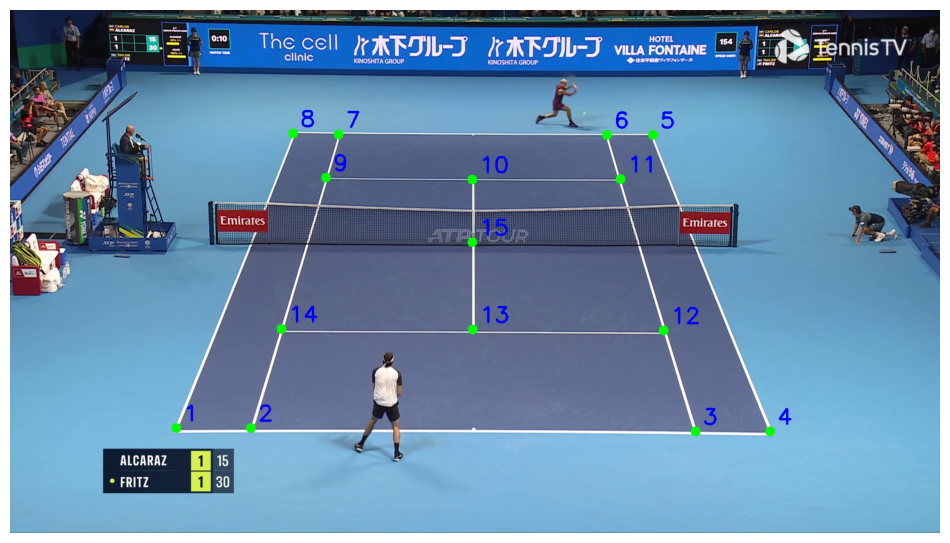

In [43]:
import cv2
import numpy as np
import supervision as sv

# Asumsi CONFIG, model_field, dan source_video_path sudah didefinisikan
# CONFIG = TennisCourtConfiguration()

frame_generator = sv.get_video_frames_generator(source_video_path, start=100)
frame = next(frame_generator)
annotated_frame = frame.copy()

result = model_field(frame, conf=0.3)[0]
key_points = sv.KeyPoints.from_ultralytics(result)

# Filter titik dengan confidence tinggi
confidence_filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][confidence_filter]

# Ambil juga indeks asli dari titik yang lolos filter
original_indices = np.where(confidence_filter)[0]

print(f"Total titik yang terdeteksi dengan confidence > 0.5: {len(frame_reference_points)}")
print("Menggambar nomor indeks pada frame...")

# Loop melalui titik yang terdeteksi dan gambar nomor indeksnya
for i, point in enumerate(frame_reference_points):
    # Dapatkan indeks asli (1-15) dari titik ini
    original_index = original_indices[i] + 1
    
    # Konversi koordinat untuk menggambar
    center = (int(point[0]), int(point[1]))
    
    # Gambar lingkaran pada titik
    cv2.circle(annotated_frame, center, 10, (0, 255, 0), -1) # Lingkaran Hijau
    
    # Tulis nomor indeks di sebelahnya
    cv2.putText(annotated_frame, str(original_index), (center[0] + 15, center[1] - 15), 
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3) # Teks Biru

# Tampilkan hasilnya
sv.plot_image(annotated_frame)

In [54]:
import cv2
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple

# Konfigurasi final dengan urutan keypoints yang sudah benar disematkan di sini
@dataclass
class TennisCourtConfiguration:
    length: int = 2377
    width: int = 1097
    singles_width: int = 823
    service_line_to_net: int = 640

    @property
    def doubles_alley_width(self) -> float:
        return (self.width - self.singles_width) / 2

    @property
    def keypoints(self) -> List[Tuple[float, float]]:
        top_service_y = self.length / 2 - self.service_line_to_net
        bottom_service_y = self.length / 2 + self.service_line_to_net
        
        p_kiri_bawah_luar = (0, self.length)
        p_kiri_bawah_dalam = (self.doubles_alley_width, self.length)
        p_kanan_bawah_dalam = (self.width - self.doubles_alley_width, self.length)
        p_kanan_bawah_luar = (self.width, self.length)
        p_kanan_atas_luar = (self.width, 0)
        p_kanan_atas_dalam = (self.width - self.doubles_alley_width, 0)
        p_kiri_atas_dalam = (self.doubles_alley_width, 0)
        p_kiri_atas_luar = (0, 0)
        p_servis_kiri_atas = (self.doubles_alley_width, top_service_y)
        p_t_atas = (self.width / 2, top_service_y)
        p_servis_kanan_atas = (self.width - self.doubles_alley_width, top_service_y)
        p_servis_kanan_bawah = (self.width - self.doubles_alley_width, bottom_service_y)
        p_t_bawah = (self.width / 2, bottom_service_y)
        p_servis_kiri_bawah = (self.doubles_alley_width, bottom_service_y)
        p_tengah_lapangan = (self.width / 2, self.length / 2)

        return [
            p_kiri_bawah_luar, p_kiri_bawah_dalam, p_kanan_bawah_dalam, p_kanan_bawah_luar,
            p_kanan_atas_luar, p_kanan_atas_dalam, p_kiri_atas_dalam, p_kiri_atas_luar,
            p_servis_kiri_atas, p_t_atas, p_servis_kanan_atas, p_servis_kanan_bawah,
            p_t_bawah, p_servis_kiri_bawah, p_tengah_lapangan,
        ]

    @property
    def vertices(self) -> List[Tuple[float, float]]:
        all_vertices = self.keypoints
        all_vertices.append((0, self.length / 2))
        all_vertices.append((self.width, self.length / 2))
        return all_vertices

    @property
    def edges(self) -> List[Tuple[int, int]]:
        return [
            (1, 4), (8, 5), (1, 8), (4, 5), (2, 7), (3, 6),
            (9, 11), (14, 12), (10, 13), (16, 17),
        ]

# --- Kode untuk Visualisasi ---

config = TennisCourtConfiguration()
scale = 0.4
padding = 60
line_thickness = 2
font_scale = 1.0
font_thickness = 2

scaled_length = int(config.length * scale)
scaled_width = int(config.width * scale)

# Membuat kanvas potrait (tinggi, lebar)
court_image = np.full(
    (scaled_length + 2 * padding, scaled_width + 2 * padding, 3),
    (58, 83, 164), 
    dtype=np.uint8
)

# Menggunakan config.vertices (17 titik) dan config.edges untuk menggambar
drawing_vertices = config.vertices
for start, end in config.edges:
    p1 = (int(drawing_vertices[start - 1][0] * scale) + padding, int(drawing_vertices[start - 1][1] * scale) + padding)
    p2 = (int(drawing_vertices[end - 1][0] * scale) + padding, int(drawing_vertices[end - 1][1] * scale) + padding)
    cv2.line(court_image, p1, p2, (255, 255, 255), line_thickness)

# Gambar dan nomori semua 17 titik
for i, vertex in enumerate(drawing_vertices):
    x, y = vertex
    center = (int(x * scale) + padding, int(y * scale) + padding)
    label = str(i + 1)
    # Titik 1-15 (keypoints) akan berwarna kuning
    # Titik 16-17 (ujung net) akan berwarna oranye agar mudah dikenali
    color = (0, 165, 255) if i >= 15 else (0, 255, 255) 
    cv2.circle(court_image, center, 10, color, -1)
    cv2.putText(court_image, label, (center[0] + 8, center[1] - 8), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), font_thickness)

output_filename = "tennis_court_final_portrait_visualization.png"
cv2.imwrite(output_filename, court_image)

print(f"Gambar visualisasi final '{output_filename}' berhasil dibuat!")

Gambar visualisasi final 'tennis_court_final_portrait_visualization.png' berhasil dibuat!


In [10]:
import os
import cv2
import numpy as np
import supervision as sv
from tqdm import tqdm
from collections import defaultdict
from ultralytics import YOLO

# --- Impor Konfigurasi dan Helper Anda ---
# Pastikan file-file ini berada di direktori yang sama atau dapat diakses
from config.tennis_court import TennisCourtConfiguration
from config.tennis_annotator import draw_court, draw_points_on_court
from sports.common.view import ViewTransformer

# --- 1. KONFIGURASI DAN INISIALISASI ---

# Ganti dengan path video dan model Anda
SOURCE_VIDEO_PATH = "examples/test_video/video1.mp4"
TARGET_VIDEO_DIR = "output/bounce_analysis/"
os.makedirs(TARGET_VIDEO_DIR, exist_ok=True)
ANNOTATED_VIDEO_PATH = os.path.join(TARGET_VIDEO_DIR, "annotated_video.mp4")
BOUNCE_MAP_PATH = os.path.join(TARGET_VIDEO_DIR, "bounce_map.png")

# Muat semua model Anda
model = YOLO("models/objectDetections/best.pt") # Model untuk deteksi pemain dan bola
model_field = YOLO("models/keypoints/best.pt") # Model untuk deteksi keypoints lapangan
CONFIG = TennisCourtConfiguration()

# Inisialisasi Tracker hanya untuk bola
ball_tracker = sv.ByteTrack(frame_rate=30)
BALL_CLASS_ID = 0 # Ganti jika ID kelas bola di model Anda berbeda

# Inisialisasi Annotator untuk visualisasi
box_annotator = sv.BoxAnnotator(thickness=2)
trace_annotator = sv.TraceAnnotator(thickness=2, trace_length=150)
bounce_marker = sv.LabelAnnotator()


# --- 2. FUNGSI HELPER UNTUK HOMOGRAFI ---

def get_homography_transformer(frame: np.ndarray, field_model, config) -> ViewTransformer:
    """Mencoba menghitung transformer homografi dari satu frame."""
    try:
        result = field_model(frame, conf=0.3)[0]
        key_points = sv.KeyPoints.from_ultralytics(result)
        filter_kp = key_points.confidence[0] > 0.5

        if np.sum(filter_kp) >= 4:
            frame_reference_points = key_points.xy[0][filter_kp]
            pitch_reference_points = np.array(config.keypoints)[filter_kp]
            transformer = ViewTransformer(source=frame_reference_points, target=pitch_reference_points)
            return transformer
    except Exception as e:
        print(f"Homography calculation failed: {e}")
    return None

# --- 3. PENYIMPANAN DATA & LOOP UTAMA ---

# kamus untuk menyimpan lintasan bola {tracker_id: [(koordinat, frame_index), ...]}
ball_trajectories = defaultdict(list)
# daftar untuk menyimpan lokasi pantulan yang sudah dipetakan ke denah 2D
bounce_locations_on_court = []
# set untuk menyimpan ID pantulan yang sudah terdeteksi agar tidak duplikat
detected_bounces = set()

source_video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(ANNOTATED_VIDEO_PATH, video_info=source_video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

transformer = None

with video_sink:
    for frame_idx, frame in enumerate(tqdm(frame_generator, total=source_video_info.total_frames)):
        
        # Coba hitung homografi jika belum berhasil
        if transformer is None:
            transformer = get_homography_transformer(frame, model_field, CONFIG)
            if transformer is None:
                print(f"Skipping frame {frame_idx} due to failed homography.")
                video_sink.write_frame(frame) # Tulis frame asli jika gagal
                continue

        # Deteksi bola
        result = model(frame, conf=0.2, classes=[BALL_CLASS_ID])[0]
        ball_detections = sv.Detections.from_ultralytics(result)

        # Lacak bola
        tracked_balls = ball_tracker.update_with_detections(detections=ball_detections)
        
        annotated_frame = frame.copy()
        
        # Simpan lintasan dan analisis pantulan
        bounce_detections_for_frame = []

        for det in tracked_balls:
            xyxy, _, _, _, tracker_id, _ = det
            
            # Ambil titik tengah bawah sebagai acuan
            anchor_point = np.array([(xyxy[0] + xyxy[2]) / 2, xyxy[3]])
            ball_trajectories[tracker_id].append((anchor_point, frame_idx))

            # --- 4. LOGIKA ANALISIS PANTULAN ---
            # Butuh minimal 3 titik untuk mendeteksi puncak/lembah
            if len(ball_trajectories[tracker_id]) > 3:
                # Ambil 3 titik terakhir: t-2, t-1 (sebelumnya), t (sekarang)
                p2_coord, p2_idx = ball_trajectories[tracker_id][-3]
                p1_coord, p1_idx = ball_trajectories[tracker_id][-2]
                
                y2 = p2_coord[1] # Koordinat y di frame t-2
                y1 = p1_coord[1] # Koordinat y di frame t-1

                # Pantulan terjadi jika y di frame sebelumnya adalah MAKSIMUM lokal
                # (bola berhenti jatuh dan mulai naik)
                # Cek juga agar pantulan yang sama tidak dideteksi berulang kali
                bounce_id = f"{tracker_id}-{p1_idx}"
                if y1 > y2 and y1 > anchor_point[1] and bounce_id not in detected_bounces:
                    print(f"Bounce detected for ball ID {tracker_id} at frame {p1_idx}!")
                    
                    # Tandai pantulan untuk visualisasi di frame
                    bounce_detection = sv.Detections(xyxy=np.array([xyxy]))
                    bounce_detections_for_frame.append(bounce_detection)

                    # Petakan titik pantulan ke denah 2D
                    bounce_point_video = np.array([p1_coord])
                    bounce_point_court = transformer.transform_points(points=bounce_point_video)
                    
                    if bounce_point_court is not None and len(bounce_point_court) > 0:
                        bounce_locations_on_court.append(bounce_point_court[0])
                        detected_bounces.add(bounce_id)

        # Anotasi video
        annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=tracked_balls)
        annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=tracked_balls)
        # Tandai pantulan yang baru terdeteksi di frame ini
        for bounce_det in bounce_detections_for_frame:
            annotated_frame = bounce_marker.annotate(scene=annotated_frame, detections=bounce_det)

        video_sink.write_frame(annotated_frame)

# --- 5. VISUALISASI AKHIR ---
print("Processing complete. Creating final bounce map...")

# Buat denah lapangan kosong
bounce_map_image = draw_court(CONFIG)

# Gambar semua titik pantulan yang terkumpul
if bounce_locations_on_court:
    bounce_points_np = np.array(bounce_locations_on_court)
    bounce_map_image = draw_points_on_court(
        config=CONFIG,
        xy=bounce_points_np,
        face_color=sv.Color.RED,
        radius=10,
        court=bounce_map_image
    )

cv2.imwrite(BOUNCE_MAP_PATH, bounce_map_image)
print(f"✅ Analisis selesai! Video anotasi disimpan di '{ANNOTATED_VIDEO_PATH}'")
print(f"🗺️ Peta pantulan disimpan di '{BOUNCE_MAP_PATH}'")

  0%|          | 0/1835 [00:00<?, ?it/s]


0: 736x1280 1 tennis_court, 87.6ms
Speed: 4.7ms preprocess, 87.6ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 416x736 1 ball, 36.1ms
Speed: 1.8ms preprocess, 36.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


  0%|          | 1/1835 [00:01<32:50,  1.07s/it]


0: 416x736 1 ball, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


  0%|          | 3/1835 [00:01<09:46,  3.12it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.7ms preprocess, 32.7ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.7ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  0%|          | 5/1835 [00:01<05:40,  5.38it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


  0%|          | 8/1835 [00:01<03:27,  8.79it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  1%|          | 11/1835 [00:01<02:37, 11.55it/s]


0: 416x736 1 ball, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.8ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


  1%|          | 14/1835 [00:01<02:11, 13.89it/s]


0: 416x736 1 ball, 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 1.6ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  1%|          | 17/1835 [00:01<01:53, 16.05it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  1%|          | 19/1835 [00:01<01:49, 16.63it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  1%|          | 22/1835 [00:02<01:42, 17.77it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


  1%|▏         | 25/1835 [00:02<01:38, 18.42it/s]


0: 416x736 1 ball, 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  2%|▏         | 28/1835 [00:02<01:35, 18.97it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  2%|▏         | 31/1835 [00:02<01:32, 19.49it/s]


0: 416x736 (no detections), 32.6ms
Speed: 1.7ms preprocess, 32.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  2%|▏         | 34/1835 [00:02<01:28, 20.41it/s]


0: 416x736 (no detections), 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  2%|▏         | 37/1835 [00:02<01:29, 20.12it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


  2%|▏         | 40/1835 [00:03<01:28, 20.28it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  2%|▏         | 43/1835 [00:03<01:27, 20.38it/s]


0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


  3%|▎         | 46/1835 [00:03<01:27, 20.46it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.7ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  3%|▎         | 49/1835 [00:03<01:27, 20.49it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


  3%|▎         | 52/1835 [00:03<01:27, 20.46it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  3%|▎         | 55/1835 [00:03<01:24, 20.95it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  3%|▎         | 58/1835 [00:03<01:26, 20.62it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.2ms
Speed: 1.9ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  3%|▎         | 61/1835 [00:04<01:26, 20.47it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


  3%|▎         | 64/1835 [00:04<01:24, 21.07it/s]


0: 416x736 (no detections), 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.1ms
Speed: 1.5ms preprocess, 32.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  4%|▎         | 67/1835 [00:04<01:23, 21.27it/s]


0: 416x736 1 ball, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  4%|▍         | 70/1835 [00:04<01:23, 21.09it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  4%|▍         | 73/1835 [00:04<01:26, 20.33it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  4%|▍         | 76/1835 [00:04<01:26, 20.39it/s]


0: 416x736 1 ball, 32.7ms
Speed: 2.3ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 2.2ms preprocess, 32.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


  4%|▍         | 79/1835 [00:04<01:25, 20.42it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  4%|▍         | 82/1835 [00:05<01:25, 20.43it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  5%|▍         | 85/1835 [00:05<01:25, 20.39it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


  5%|▍         | 88/1835 [00:05<01:25, 20.46it/s]


0: 416x736 (no detections), 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


  5%|▍         | 91/1835 [00:05<01:25, 20.51it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.7ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.8ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  5%|▌         | 94/1835 [00:05<01:25, 20.30it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  5%|▌         | 97/1835 [00:05<01:23, 20.72it/s]


0: 416x736 (no detections), 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  5%|▌         | 100/1835 [00:05<01:25, 20.34it/s]


0: 416x736 (no detections), 32.9ms
Speed: 1.9ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  6%|▌         | 103/1835 [00:06<01:23, 20.68it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


  6%|▌         | 106/1835 [00:06<01:24, 20.36it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.5ms
Speed: 1.8ms preprocess, 32.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


  6%|▌         | 109/1835 [00:06<01:21, 21.11it/s]


0: 416x736 (no detections), 32.6ms
Speed: 1.8ms preprocess, 32.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.8ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  6%|▌         | 112/1835 [00:06<01:23, 20.59it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  6%|▋         | 115/1835 [00:06<01:23, 20.62it/s]


0: 416x736 (no detections), 32.1ms
Speed: 1.9ms preprocess, 32.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.3ms
Speed: 1.8ms preprocess, 32.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  6%|▋         | 118/1835 [00:06<01:22, 20.73it/s]


0: 416x736 (no detections), 31.9ms
Speed: 1.5ms preprocess, 31.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 31.0ms
Speed: 1.6ms preprocess, 31.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  7%|▋         | 121/1835 [00:06<01:21, 20.93it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  7%|▋         | 124/1835 [00:07<01:21, 21.03it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


  7%|▋         | 127/1835 [00:07<01:21, 20.97it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 2.0ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  7%|▋         | 130/1835 [00:07<01:19, 21.43it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 2.0ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  7%|▋         | 133/1835 [00:07<01:23, 20.48it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  7%|▋         | 136/1835 [00:07<01:21, 20.83it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  8%|▊         | 139/1835 [00:07<01:21, 20.89it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  8%|▊         | 142/1835 [00:07<01:21, 20.74it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


  8%|▊         | 145/1835 [00:08<01:20, 21.04it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.9ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


  8%|▊         | 148/1835 [00:08<01:22, 20.33it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.7ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


  8%|▊         | 151/1835 [00:08<01:23, 20.17it/s]


0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  8%|▊         | 154/1835 [00:08<01:23, 20.21it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


  9%|▊         | 157/1835 [00:08<01:22, 20.28it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.5ms
Speed: 1.8ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  9%|▊         | 160/1835 [00:08<01:23, 20.16it/s]


0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  9%|▉         | 163/1835 [00:08<01:22, 20.34it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


  9%|▉         | 166/1835 [00:09<01:21, 20.56it/s]


0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


  9%|▉         | 169/1835 [00:09<01:22, 20.27it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


  9%|▉         | 172/1835 [00:09<01:20, 20.60it/s]


0: 416x736 1 ball, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 10%|▉         | 175/1835 [00:09<01:20, 20.65it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.7ms preprocess, 32.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 10%|▉         | 178/1835 [00:09<01:21, 20.41it/s]


0: 416x736 (no detections), 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 10%|▉         | 181/1835 [00:09<01:20, 20.60it/s]


0: 416x736 (no detections), 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.7ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 10%|█         | 184/1835 [00:09<01:18, 20.94it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 10%|█         | 187/1835 [00:10<01:19, 20.74it/s]


0: 416x736 1 ball, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 10%|█         | 190/1835 [00:10<01:19, 20.74it/s]


0: 416x736 2 balls, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 11%|█         | 193/1835 [00:10<01:19, 20.71it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.7ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 11%|█         | 196/1835 [00:10<01:18, 20.82it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 11%|█         | 199/1835 [00:10<01:16, 21.31it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 11%|█         | 202/1835 [00:10<01:17, 21.10it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.7ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 11%|█         | 205/1835 [00:10<01:17, 20.96it/s]


0: 416x736 (no detections), 32.3ms
Speed: 1.7ms preprocess, 32.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 11%|█▏        | 208/1835 [00:11<01:18, 20.75it/s]


0: 416x736 (no detections), 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 11%|█▏        | 211/1835 [00:11<01:16, 21.17it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 12%|█▏        | 214/1835 [00:11<01:18, 20.74it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 12%|█▏        | 217/1835 [00:11<01:15, 21.42it/s]


0: 416x736 1 ball, 32.5ms
Speed: 1.8ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 1.6ms preprocess, 32.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 12%|█▏        | 220/1835 [00:11<01:17, 20.80it/s]


0: 416x736 1 ball, 32.2ms
Speed: 2.0ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 12%|█▏        | 223/1835 [00:11<01:16, 20.94it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 12%|█▏        | 226/1835 [00:11<01:16, 21.03it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 12%|█▏        | 229/1835 [00:12<01:16, 20.89it/s]


0: 416x736 1 ball, 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.7ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 13%|█▎        | 232/1835 [00:12<01:18, 20.30it/s]


0: 416x736 (no detections), 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 13%|█▎        | 235/1835 [00:12<01:18, 20.51it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 13%|█▎        | 238/1835 [00:12<01:17, 20.54it/s]


0: 416x736 1 ball, 32.3ms
Speed: 1.8ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 13%|█▎        | 241/1835 [00:12<01:16, 20.90it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 13%|█▎        | 244/1835 [00:12<01:17, 20.52it/s]


0: 416x736 1 ball, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.3ms
Speed: 1.7ms preprocess, 32.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 13%|█▎        | 247/1835 [00:13<01:16, 20.70it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.5ms preprocess, 33.7ms inference, 5.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 2.0ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.2ms
Speed: 1.6ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 14%|█▎        | 250/1835 [00:13<01:17, 20.37it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.1ms
Speed: 1.5ms preprocess, 32.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 14%|█▍        | 253/1835 [00:13<01:17, 20.48it/s]


0: 416x736 1 ball, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 1.6ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.0ms
Speed: 1.6ms preprocess, 32.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 14%|█▍        | 256/1835 [00:13<01:17, 20.30it/s]


0: 416x736 2 balls, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 1.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 14%|█▍        | 259/1835 [00:13<01:16, 20.50it/s]


0: 416x736 1 ball, 32.2ms
Speed: 1.8ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.8ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 14%|█▍        | 262/1835 [00:13<01:16, 20.65it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.0ms
Speed: 1.6ms preprocess, 32.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 14%|█▍        | 265/1835 [00:13<01:16, 20.53it/s]


0: 416x736 1 ball, 32.0ms
Speed: 1.6ms preprocess, 32.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 736)


 15%|█▍        | 268/1835 [00:14<01:16, 20.46it/s]


0: 416x736 1 ball, 32.1ms
Speed: 1.8ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 31.8ms
Speed: 1.6ms preprocess, 31.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.3ms
Speed: 1.6ms preprocess, 32.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 15%|█▍        | 271/1835 [00:14<01:16, 20.50it/s]


0: 416x736 (no detections), 32.2ms
Speed: 1.5ms preprocess, 32.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 1.5ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 31.6ms
Speed: 1.5ms preprocess, 31.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 15%|█▍        | 274/1835 [00:14<01:15, 20.67it/s]


0: 416x736 1 ball, 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.2ms
Speed: 1.5ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 15%|█▌        | 277/1835 [00:14<01:15, 20.73it/s]


0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 1.7ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 15%|█▌        | 280/1835 [00:14<01:17, 20.19it/s]


0: 416x736 1 ball, 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.2ms
Speed: 1.6ms preprocess, 32.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 31.7ms
Speed: 2.0ms preprocess, 31.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 15%|█▌        | 283/1835 [00:14<01:16, 20.21it/s]


0: 416x736 1 ball, 31.9ms
Speed: 1.5ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 1.6ms preprocess, 32.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.1ms
Speed: 1.6ms preprocess, 32.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 16%|█▌        | 286/1835 [00:14<01:15, 20.50it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 31.5ms
Speed: 1.5ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 16%|█▌        | 289/1835 [00:15<01:15, 20.49it/s]


0: 416x736 (no detections), 34.4ms
Speed: 1.6ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 16%|█▌        | 292/1835 [00:15<01:15, 20.42it/s]


0: 416x736 (no detections), 33.4ms
Speed: 1.8ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 16%|█▌        | 295/1835 [00:15<01:14, 20.76it/s]


0: 416x736 (no detections), 33.3ms
Speed: 1.5ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.8ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 16%|█▌        | 298/1835 [00:15<01:15, 20.47it/s]


0: 416x736 (no detections), 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 16%|█▋        | 301/1835 [00:15<01:15, 20.39it/s]


0: 416x736 (no detections), 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 17%|█▋        | 304/1835 [00:15<01:14, 20.67it/s]


0: 416x736 1 ball, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 17%|█▋        | 307/1835 [00:15<01:14, 20.48it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 2.0ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 17%|█▋        | 310/1835 [00:16<01:13, 20.69it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 17%|█▋        | 313/1835 [00:16<01:14, 20.52it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 17%|█▋        | 316/1835 [00:16<01:13, 20.58it/s]


0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 17%|█▋        | 319/1835 [00:16<01:12, 20.77it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 18%|█▊        | 322/1835 [00:16<01:13, 20.58it/s]


0: 416x736 (no detections), 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 18%|█▊        | 325/1835 [00:16<01:13, 20.43it/s]


0: 416x736 2 balls, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 32.7ms
Speed: 1.7ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 18%|█▊        | 328/1835 [00:16<01:11, 21.01it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 18%|█▊        | 331/1835 [00:17<01:12, 20.64it/s]


0: 416x736 2 balls, 32.3ms
Speed: 1.6ms preprocess, 32.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 2.4ms preprocess, 32.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 18%|█▊        | 334/1835 [00:17<01:13, 20.32it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 18%|█▊        | 337/1835 [00:17<01:13, 20.37it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 19%|█▊        | 340/1835 [00:17<01:13, 20.44it/s]


0: 416x736 2 balls, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 19%|█▊        | 343/1835 [00:17<01:13, 20.19it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 19%|█▉        | 346/1835 [00:17<01:13, 20.33it/s]


0: 416x736 1 ball, 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 19%|█▉        | 349/1835 [00:17<01:11, 20.73it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.8ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.3ms
Speed: 1.5ms preprocess, 32.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 3 balls, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 19%|█▉        | 352/1835 [00:18<01:12, 20.54it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 19%|█▉        | 355/1835 [00:18<01:12, 20.42it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.5ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 20%|█▉        | 358/1835 [00:18<01:12, 20.31it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 20%|█▉        | 361/1835 [00:18<01:11, 20.71it/s]


0: 416x736 1 ball, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.7ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 31.9ms
Speed: 2.0ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 20%|█▉        | 364/1835 [00:18<01:13, 20.15it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 20%|██        | 367/1835 [00:18<01:10, 20.85it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 20%|██        | 370/1835 [00:19<01:11, 20.52it/s]


0: 416x736 1 ball, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 20%|██        | 373/1835 [00:19<01:11, 20.45it/s]


0: 416x736 1 ball, 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 20%|██        | 376/1835 [00:19<01:13, 19.94it/s]


0: 416x736 1 ball, 34.8ms
Speed: 1.5ms preprocess, 34.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 1.7ms preprocess, 33.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 21%|██        | 379/1835 [00:19<01:12, 20.01it/s]


0: 416x736 1 ball, 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 21%|██        | 382/1835 [00:19<01:11, 20.19it/s]


0: 416x736 1 ball, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.5ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.6ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 21%|██        | 385/1835 [00:19<01:12, 20.06it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.7ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.7ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 21%|██        | 388/1835 [00:19<01:12, 19.92it/s]


0: 416x736 (no detections), 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.2ms
Speed: 1.6ms preprocess, 32.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 21%|██▏       | 391/1835 [00:20<01:11, 20.14it/s]


0: 416x736 1 ball, 31.9ms
Speed: 1.7ms preprocess, 31.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 21%|██▏       | 394/1835 [00:20<01:10, 20.30it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.7ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 22%|██▏       | 397/1835 [00:20<01:08, 20.99it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 22%|██▏       | 400/1835 [00:20<01:10, 20.33it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.9ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 22%|██▏       | 403/1835 [00:20<01:10, 20.32it/s]


0: 416x736 1 ball, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.7ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 22%|██▏       | 406/1835 [00:20<01:11, 20.04it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 22%|██▏       | 409/1835 [00:20<01:08, 20.74it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.9ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 22%|██▏       | 412/1835 [00:21<01:10, 20.08it/s]


0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 23%|██▎       | 415/1835 [00:21<01:10, 20.16it/s]


0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 1.5ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 23%|██▎       | 418/1835 [00:21<01:09, 20.25it/s]


0: 416x736 (no detections), 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 23%|██▎       | 421/1835 [00:21<01:10, 20.15it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.5ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 23%|██▎       | 424/1835 [00:21<01:08, 20.49it/s]


0: 416x736 (no detections), 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 1.5ms preprocess, 32.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 23%|██▎       | 427/1835 [00:21<01:09, 20.25it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.5ms preprocess, 32.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 23%|██▎       | 430/1835 [00:21<01:09, 20.15it/s]


0: 416x736 (no detections), 33.1ms
Speed: 1.5ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 1.6ms preprocess, 34.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 1.7ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 24%|██▎       | 433/1835 [00:22<01:09, 20.13it/s]


0: 416x736 (no detections), 32.1ms
Speed: 1.5ms preprocess, 32.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.6ms
Speed: 1.5ms preprocess, 32.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 24%|██▍       | 436/1835 [00:22<01:07, 20.68it/s]


0: 416x736 (no detections), 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.8ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 24%|██▍       | 439/1835 [00:22<01:08, 20.29it/s]


0: 416x736 (no detections), 32.5ms
Speed: 1.6ms preprocess, 32.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 24%|██▍       | 442/1835 [00:22<01:08, 20.45it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 1.8ms preprocess, 32.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 24%|██▍       | 445/1835 [00:22<01:07, 20.49it/s]


0: 416x736 1 ball, 32.6ms
Speed: 1.9ms preprocess, 32.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.8ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.7ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 24%|██▍       | 448/1835 [00:22<01:07, 20.46it/s]


0: 416x736 1 ball, 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 1.5ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.2ms
Speed: 1.5ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▍       | 451/1835 [00:23<01:07, 20.49it/s]


0: 416x736 1 ball, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.8ms
Speed: 1.7ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.3ms
Speed: 1.6ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▍       | 454/1835 [00:23<01:07, 20.40it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.5ms preprocess, 34.5ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.8ms
Speed: 1.5ms preprocess, 35.8ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▍       | 457/1835 [00:23<01:09, 19.73it/s]


0: 416x736 (no detections), 35.6ms
Speed: 1.5ms preprocess, 35.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.8ms
Speed: 1.8ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▌       | 459/1835 [00:23<01:09, 19.75it/s]


0: 416x736 1 ball, 34.1ms
Speed: 1.6ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.6ms
Speed: 2.0ms preprocess, 37.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▌       | 461/1835 [00:23<01:10, 19.43it/s]


0: 416x736 1 ball, 37.5ms
Speed: 2.3ms preprocess, 37.5ms inference, 3.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.9ms
Speed: 2.3ms preprocess, 37.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▌       | 463/1835 [00:23<01:13, 18.72it/s]


0: 416x736 2 balls, 39.3ms
Speed: 1.7ms preprocess, 39.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.9ms
Speed: 2.3ms preprocess, 36.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▌       | 465/1835 [00:23<01:14, 18.31it/s]


0: 416x736 1 ball, 39.2ms
Speed: 2.2ms preprocess, 39.2ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.8ms
Speed: 1.9ms preprocess, 38.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 25%|██▌       | 467/1835 [00:23<01:16, 17.94it/s]


0: 416x736 1 ball, 38.8ms
Speed: 2.2ms preprocess, 38.8ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.7ms
Speed: 1.8ms preprocess, 36.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▌       | 469/1835 [00:23<01:17, 17.70it/s]


0: 416x736 1 ball, 35.5ms
Speed: 1.9ms preprocess, 35.5ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.7ms
Speed: 2.3ms preprocess, 35.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▌       | 471/1835 [00:24<01:16, 17.79it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.8ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▌       | 473/1835 [00:24<01:15, 18.07it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.8ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▌       | 475/1835 [00:24<01:13, 18.42it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 1.7ms preprocess, 34.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▌       | 477/1835 [00:24<01:13, 18.47it/s]


0: 416x736 2 balls, 34.3ms
Speed: 1.8ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▌       | 479/1835 [00:24<01:13, 18.49it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▌       | 481/1835 [00:24<01:13, 18.37it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.9ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▋       | 483/1835 [00:24<01:13, 18.37it/s]


0: 416x736 1 ball, 35.0ms
Speed: 1.7ms preprocess, 35.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 26%|██▋       | 485/1835 [00:24<01:13, 18.34it/s]


0: 416x736 1 ball, 36.1ms
Speed: 1.8ms preprocess, 36.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 1.8ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 487/1835 [00:24<01:13, 18.37it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.3ms preprocess, 34.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 489/1835 [00:25<01:13, 18.37it/s]


0: 416x736 1 ball, 34.0ms
Speed: 1.9ms preprocess, 34.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.0ms
Speed: 1.9ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 491/1835 [00:25<01:12, 18.47it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 1.8ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 493/1835 [00:25<01:11, 18.86it/s]


0: 416x736 (no detections), 34.5ms
Speed: 2.3ms preprocess, 34.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.9ms
Speed: 1.9ms preprocess, 34.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 495/1835 [00:25<01:11, 18.79it/s]


0: 416x736 1 ball, 34.8ms
Speed: 2.3ms preprocess, 34.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.8ms preprocess, 33.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 497/1835 [00:25<01:11, 18.73it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 1.6ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 499/1835 [00:25<01:11, 18.70it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 501/1835 [00:25<01:11, 18.61it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.7ms preprocess, 34.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 27%|██▋       | 503/1835 [00:25<01:11, 18.69it/s]


0: 416x736 1 ball, 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 505/1835 [00:25<01:10, 18.76it/s]


0: 416x736 (no detections), 34.4ms
Speed: 1.8ms preprocess, 34.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 507/1835 [00:26<01:10, 18.87it/s]


0: 416x736 1 ball, 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.3ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 509/1835 [00:26<01:10, 18.86it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 511/1835 [00:26<01:10, 18.76it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.4ms preprocess, 33.7ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 513/1835 [00:26<01:10, 18.80it/s]


0: 416x736 1 ball, 35.3ms
Speed: 1.7ms preprocess, 35.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 515/1835 [00:26<01:12, 18.18it/s]


0: 416x736 1 ball, 35.1ms
Speed: 1.9ms preprocess, 35.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 517/1835 [00:26<01:12, 18.23it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 519/1835 [00:26<01:12, 18.26it/s]


0: 416x736 (no detections), 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 28%|██▊       | 521/1835 [00:26<01:11, 18.41it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▊       | 523/1835 [00:26<01:10, 18.52it/s]


0: 416x736 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 1.8ms preprocess, 34.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▊       | 525/1835 [00:27<01:10, 18.64it/s]


0: 416x736 1 ball, 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.2ms
Speed: 1.9ms preprocess, 35.2ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▊       | 527/1835 [00:27<01:10, 18.59it/s]


0: 416x736 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 1.8ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▉       | 529/1835 [00:27<01:09, 18.68it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.7ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▉       | 531/1835 [00:27<01:10, 18.43it/s]


0: 416x736 1 ball, 35.0ms
Speed: 1.6ms preprocess, 35.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.6ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▉       | 533/1835 [00:27<01:10, 18.54it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.5ms preprocess, 33.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▉       | 535/1835 [00:27<01:09, 18.65it/s]


0: 416x736 1 ball, 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.9ms preprocess, 35.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▉       | 537/1835 [00:27<01:09, 18.57it/s]


0: 416x736 1 ball, 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.0ms
Speed: 1.8ms preprocess, 35.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▉       | 539/1835 [00:27<01:09, 18.57it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 29%|██▉       | 541/1835 [00:27<01:09, 18.68it/s]


0: 416x736 1 ball, 35.3ms
Speed: 1.9ms preprocess, 35.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 30%|██▉       | 543/1835 [00:27<01:09, 18.54it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 1.8ms preprocess, 34.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 30%|██▉       | 545/1835 [00:28<01:10, 18.35it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 1.9ms preprocess, 34.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 30%|██▉       | 547/1835 [00:28<01:10, 18.34it/s]


0: 416x736 1 ball, 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 30%|██▉       | 549/1835 [00:28<01:10, 18.31it/s]


0: 416x736 1 ball, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 30%|███       | 551/1835 [00:28<01:09, 18.41it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 1.6ms preprocess, 34.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 30%|███       | 553/1835 [00:28<01:10, 18.28it/s]


0: 416x736 2 balls, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 30%|███       | 555/1835 [00:28<01:09, 18.46it/s]


0: 416x736 1 ball, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.9ms preprocess, 35.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 30%|███       | 557/1835 [00:28<01:09, 18.42it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.8ms preprocess, 34.7ms inference, 3.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 30%|███       | 559/1835 [00:28<01:09, 18.34it/s]


0: 416x736 2 balls, 33.9ms
Speed: 2.4ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 31%|███       | 561/1835 [00:28<01:08, 18.65it/s]


0: 416x736 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.3ms
Speed: 1.7ms preprocess, 35.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 31%|███       | 563/1835 [00:29<01:07, 18.78it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.5ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 31%|███       | 565/1835 [00:29<01:07, 18.75it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.8ms preprocess, 34.5ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 31%|███       | 567/1835 [00:29<01:07, 18.69it/s]


0: 416x736 1 ball, 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 31%|███       | 569/1835 [00:29<01:07, 18.70it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.8ms preprocess, 34.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 31%|███       | 571/1835 [00:29<01:07, 18.79it/s]


0: 416x736 1 ball, 35.0ms
Speed: 1.8ms preprocess, 35.0ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 31%|███       | 573/1835 [00:29<01:08, 18.54it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 31%|███▏      | 575/1835 [00:29<01:07, 18.74it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 31%|███▏      | 577/1835 [00:29<01:07, 18.76it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 1.9ms preprocess, 34.3ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 579/1835 [00:29<01:07, 18.53it/s]


0: 416x736 1 ball, 33.5ms
Speed: 2.3ms preprocess, 33.5ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 581/1835 [00:30<01:06, 18.80it/s]


0: 416x736 1 ball, 34.6ms
Speed: 2.3ms preprocess, 34.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 2.6ms preprocess, 33.3ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 583/1835 [00:30<01:06, 18.80it/s]


0: 416x736 1 ball, 34.4ms
Speed: 1.8ms preprocess, 34.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.0ms
Speed: 1.9ms preprocess, 35.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 585/1835 [00:30<01:06, 18.73it/s]


0: 416x736 1 ball, 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 587/1835 [00:30<01:06, 18.67it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 1.8ms preprocess, 34.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 589/1835 [00:30<01:07, 18.59it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 591/1835 [00:30<01:07, 18.45it/s]


0: 416x736 (no detections), 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 593/1835 [00:30<01:06, 18.69it/s]


0: 416x736 (no detections), 34.0ms
Speed: 1.8ms preprocess, 34.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 2.4ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 32%|███▏      | 595/1835 [00:30<01:05, 18.96it/s]


0: 416x736 (no detections), 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 597/1835 [00:30<01:04, 19.05it/s]


0: 416x736 (no detections), 34.7ms
Speed: 1.8ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 599/1835 [00:30<01:05, 18.92it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.8ms preprocess, 33.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 601/1835 [00:31<01:05, 18.87it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 603/1835 [00:31<01:05, 18.70it/s]


0: 416x736 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 605/1835 [00:31<01:06, 18.59it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 607/1835 [00:31<01:05, 18.81it/s]


0: 416x736 1 ball, 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 609/1835 [00:31<01:05, 18.63it/s]


0: 416x736 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 1.9ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 611/1835 [00:31<01:05, 18.71it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 33%|███▎      | 613/1835 [00:31<01:05, 18.58it/s]


0: 416x736 1 ball, 35.0ms
Speed: 1.9ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▎      | 615/1835 [00:31<01:06, 18.32it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.5ms preprocess, 33.4ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.9ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▎      | 617/1835 [00:31<01:05, 18.54it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▎      | 619/1835 [00:32<01:04, 18.83it/s]


0: 416x736 1 ball, 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▍      | 621/1835 [00:32<01:04, 18.93it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▍      | 623/1835 [00:32<01:03, 18.98it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▍      | 625/1835 [00:32<01:04, 18.75it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▍      | 627/1835 [00:32<01:05, 18.52it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 3.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 1.8ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▍      | 629/1835 [00:32<01:05, 18.39it/s]


0: 416x736 1 ball, 34.3ms
Speed: 1.9ms preprocess, 34.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▍      | 631/1835 [00:32<01:05, 18.39it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 1.7ms preprocess, 34.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 34%|███▍      | 633/1835 [00:32<01:05, 18.43it/s]


0: 416x736 1 ball, 32.1ms
Speed: 2.2ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▍      | 635/1835 [00:32<01:05, 18.46it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▍      | 637/1835 [00:33<01:05, 18.40it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▍      | 639/1835 [00:33<01:05, 18.13it/s]


0: 416x736 1 ball, 35.7ms
Speed: 1.9ms preprocess, 35.7ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▍      | 641/1835 [00:33<01:06, 17.82it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.9ms preprocess, 34.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 34.2ms
Speed: 1.7ms preprocess, 34.2ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▌      | 643/1835 [00:33<01:07, 17.69it/s]


0: 416x736 1 ball, 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▌      | 645/1835 [00:33<01:08, 17.41it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.5ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▌      | 647/1835 [00:33<01:08, 17.24it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▌      | 649/1835 [00:33<01:08, 17.29it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 35%|███▌      | 651/1835 [00:33<01:07, 17.50it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▌      | 653/1835 [00:33<01:06, 17.89it/s]


0: 416x736 1 ball, 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.8ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▌      | 655/1835 [00:34<01:05, 18.08it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▌      | 657/1835 [00:34<01:04, 18.15it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▌      | 659/1835 [00:34<01:03, 18.44it/s]


0: 416x736 1 ball, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 1.5ms preprocess, 34.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▌      | 661/1835 [00:34<01:03, 18.58it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▌      | 663/1835 [00:34<01:02, 18.75it/s]


0: 416x736 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▌      | 665/1835 [00:34<01:02, 18.80it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▋      | 667/1835 [00:34<01:01, 18.97it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 36%|███▋      | 669/1835 [00:34<01:01, 18.97it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 1.8ms preprocess, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 672/1835 [00:34<01:00, 19.21it/s]


0: 416x736 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 674/1835 [00:35<01:00, 19.22it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.8ms preprocess, 35.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 676/1835 [00:35<01:00, 19.25it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.8ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 678/1835 [00:35<00:59, 19.37it/s]


0: 416x736 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 2.2ms preprocess, 34.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 680/1835 [00:35<00:59, 19.36it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 682/1835 [00:35<00:59, 19.39it/s]


0: 416x736 1 ball, 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 2.4ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 684/1835 [00:35<00:59, 19.46it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.8ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 37%|███▋      | 686/1835 [00:35<00:59, 19.34it/s]


0: 416x736 (no detections), 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 2.5ms preprocess, 32.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 689/1835 [00:35<00:58, 19.65it/s]


0: 416x736 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 692/1835 [00:35<00:57, 19.77it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 694/1835 [00:36<00:57, 19.78it/s]


0: 416x736 2 balls, 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 696/1835 [00:36<00:57, 19.73it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 698/1835 [00:36<00:58, 19.52it/s]


0: 416x736 1 ball, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.3ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 700/1835 [00:36<00:59, 18.95it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 702/1835 [00:36<00:59, 18.94it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 704/1835 [00:36<00:59, 18.85it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 38%|███▊      | 706/1835 [00:36<01:00, 18.80it/s]


0: 416x736 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▊      | 708/1835 [00:36<01:00, 18.68it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▊      | 710/1835 [00:36<01:00, 18.68it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.3ms preprocess, 33.8ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▉      | 712/1835 [00:37<01:00, 18.65it/s]


0: 416x736 1 ball, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.8ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▉      | 714/1835 [00:37<01:00, 18.53it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▉      | 716/1835 [00:37<01:00, 18.47it/s]


0: 416x736 1 ball, 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▉      | 718/1835 [00:37<01:00, 18.42it/s]


0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▉      | 720/1835 [00:37<01:01, 18.11it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.3ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▉      | 722/1835 [00:37<01:01, 18.24it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)


 39%|███▉      | 724/1835 [00:37<01:01, 18.17it/s]


0: 416x736 (no detections), 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 40%|███▉      | 726/1835 [00:37<01:01, 18.07it/s]


0: 416x736 (no detections), 36.4ms
Speed: 2.3ms preprocess, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 40%|███▉      | 728/1835 [00:37<01:01, 18.04it/s]


0: 416x736 1 ball, 37.4ms
Speed: 2.2ms preprocess, 37.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 40%|███▉      | 730/1835 [00:38<01:02, 17.78it/s]


0: 416x736 1 ball, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 40%|███▉      | 732/1835 [00:38<01:02, 17.71it/s]


0: 416x736 1 ball, 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 40%|████      | 734/1835 [00:38<01:01, 17.91it/s]


0: 416x736 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 40%|████      | 736/1835 [00:38<00:59, 18.37it/s]


0: 416x736 (no detections), 36.0ms
Speed: 1.6ms preprocess, 36.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 40%|████      | 738/1835 [00:38<00:59, 18.59it/s]


0: 416x736 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 40.5ms
Speed: 1.7ms preprocess, 40.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 40%|████      | 740/1835 [00:38<00:59, 18.39it/s]


0: 416x736 1 ball, 38.5ms
Speed: 2.0ms preprocess, 38.5ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 38.2ms
Speed: 2.3ms preprocess, 38.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 40%|████      | 742/1835 [00:38<01:00, 18.11it/s]


0: 416x736 1 ball, 38.7ms
Speed: 1.8ms preprocess, 38.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 40.5ms
Speed: 2.2ms preprocess, 40.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 41%|████      | 744/1835 [00:38<01:01, 17.77it/s]


0: 416x736 1 ball, 36.2ms
Speed: 1.6ms preprocess, 36.2ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 41%|████      | 746/1835 [00:38<01:01, 17.82it/s]


0: 416x736 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 1.8ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 41%|████      | 748/1835 [00:39<01:00, 18.07it/s]


0: 416x736 (no detections), 35.9ms
Speed: 1.6ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.8ms
Speed: 2.8ms preprocess, 34.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 41%|████      | 750/1835 [00:39<00:59, 18.16it/s]


0: 416x736 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 41%|████      | 752/1835 [00:39<00:59, 18.21it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 41%|████      | 754/1835 [00:39<00:58, 18.38it/s]


0: 416x736 (no detections), 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 41%|████      | 756/1835 [00:39<00:58, 18.40it/s]


0: 416x736 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 41%|████▏     | 758/1835 [00:39<00:57, 18.66it/s]


0: 416x736 (no detections), 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 41%|████▏     | 760/1835 [00:39<00:57, 18.55it/s]


0: 416x736 (no detections), 34.7ms
Speed: 1.8ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 1.6ms preprocess, 34.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 762/1835 [00:39<00:57, 18.56it/s]


0: 416x736 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 2.3ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 764/1835 [00:39<00:57, 18.60it/s]


0: 416x736 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 766/1835 [00:39<00:57, 18.64it/s]


0: 416x736 (no detections), 34.3ms
Speed: 1.6ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 768/1835 [00:40<00:57, 18.50it/s]


0: 416x736 (no detections), 33.8ms
Speed: 1.5ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 2.1ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 770/1835 [00:40<00:56, 18.71it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 772/1835 [00:40<00:57, 18.62it/s]


0: 416x736 (no detections), 35.4ms
Speed: 1.6ms preprocess, 35.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 774/1835 [00:40<00:57, 18.38it/s]


0: 416x736 (no detections), 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 776/1835 [00:40<00:57, 18.56it/s]


0: 416x736 (no detections), 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.0ms
Speed: 1.6ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 42%|████▏     | 778/1835 [00:40<00:57, 18.39it/s]


0: 416x736 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 780/1835 [00:40<00:57, 18.37it/s]


0: 416x736 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 782/1835 [00:40<00:57, 18.30it/s]


0: 416x736 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.0ms
Speed: 1.9ms preprocess, 35.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 784/1835 [00:40<00:57, 18.27it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 786/1835 [00:41<00:57, 18.40it/s]


0: 416x736 (no detections), 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 1.7ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 788/1835 [00:41<00:56, 18.46it/s]


0: 416x736 (no detections), 35.2ms
Speed: 1.7ms preprocess, 35.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 790/1835 [00:41<00:56, 18.47it/s]


0: 416x736 (no detections), 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 1.7ms preprocess, 34.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 792/1835 [00:41<00:56, 18.62it/s]


0: 416x736 (no detections), 34.5ms
Speed: 1.8ms preprocess, 34.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 794/1835 [00:41<00:55, 18.74it/s]


0: 416x736 (no detections), 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 796/1835 [00:41<00:54, 18.94it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 43%|████▎     | 798/1835 [00:41<00:55, 18.59it/s]


0: 416x736 1 ball, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 2.3ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▎     | 800/1835 [00:41<00:56, 18.47it/s]


0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▎     | 802/1835 [00:41<00:56, 18.43it/s]


0: 416x736 1 ball, 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▍     | 804/1835 [00:42<00:56, 18.33it/s]


0: 416x736 1 ball, 35.7ms
Speed: 1.8ms preprocess, 35.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▍     | 806/1835 [00:42<00:56, 18.27it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.3ms
Speed: 2.4ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▍     | 808/1835 [00:42<00:56, 18.26it/s]


0: 416x736 1 ball, 34.3ms
Speed: 1.6ms preprocess, 34.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▍     | 810/1835 [00:42<00:57, 17.78it/s]


0: 416x736 (no detections), 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▍     | 812/1835 [00:42<00:57, 17.85it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.5ms
Speed: 2.1ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▍     | 814/1835 [00:42<00:57, 17.89it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 44%|████▍     | 816/1835 [00:42<00:56, 17.90it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▍     | 818/1835 [00:42<00:56, 18.14it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 1.6ms preprocess, 32.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▍     | 820/1835 [00:42<00:55, 18.22it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.6ms preprocess, 34.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▍     | 822/1835 [00:43<00:55, 18.28it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▍     | 824/1835 [00:43<00:54, 18.46it/s]


0: 416x736 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▌     | 826/1835 [00:43<00:53, 18.73it/s]


0: 416x736 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.6ms
Speed: 1.6ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▌     | 828/1835 [00:43<00:53, 18.77it/s]


0: 416x736 (no detections), 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.4ms
Speed: 2.7ms preprocess, 32.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▌     | 830/1835 [00:43<00:53, 18.94it/s]


0: 416x736 (no detections), 33.2ms
Speed: 1.5ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.1ms
Speed: 1.8ms preprocess, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▌     | 832/1835 [00:43<00:52, 19.04it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.8ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 45%|████▌     | 834/1835 [00:43<00:53, 18.87it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▌     | 836/1835 [00:43<00:52, 19.01it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.7ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▌     | 838/1835 [00:43<00:52, 19.09it/s]


0: 416x736 1 ball, 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▌     | 840/1835 [00:43<00:52, 19.08it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▌     | 842/1835 [00:44<00:51, 19.20it/s]


0: 416x736 (no detections), 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.9ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 2.4ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▌     | 845/1835 [00:44<00:50, 19.60it/s]


0: 416x736 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▌     | 848/1835 [00:44<00:49, 19.74it/s]


0: 416x736 1 ball, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▋     | 850/1835 [00:44<00:49, 19.80it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 46%|████▋     | 853/1835 [00:44<00:49, 19.85it/s]


0: 416x736 (no detections), 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 47%|████▋     | 856/1835 [00:44<00:49, 19.89it/s]


0: 416x736 (no detections), 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 47%|████▋     | 859/1835 [00:44<00:48, 20.00it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 47%|████▋     | 861/1835 [00:45<00:48, 19.95it/s]


0: 416x736 (no detections), 33.9ms
Speed: 1.8ms preprocess, 33.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 1.6ms preprocess, 34.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.9ms preprocess, 33.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 47%|████▋     | 864/1835 [00:45<00:48, 20.05it/s]


0: 416x736 (no detections), 34.0ms
Speed: 1.6ms preprocess, 34.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 47%|████▋     | 867/1835 [00:45<00:48, 19.93it/s]


0: 416x736 1 ball, 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.7ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 47%|████▋     | 869/1835 [00:45<00:49, 19.68it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.8ms preprocess, 33.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 47%|████▋     | 871/1835 [00:45<00:49, 19.57it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 873/1835 [00:45<00:49, 19.63it/s]


0: 416x736 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 875/1835 [00:45<00:48, 19.64it/s]


0: 416x736 1 ball, 34.8ms
Speed: 1.7ms preprocess, 34.8ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 877/1835 [00:45<00:49, 19.25it/s]


0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.8ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 879/1835 [00:45<00:49, 19.41it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.9ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 881/1835 [00:46<00:49, 19.41it/s]


0: 416x736 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 883/1835 [00:46<00:49, 19.41it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.9ms
Speed: 1.9ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 885/1835 [00:46<00:48, 19.52it/s]


0: 416x736 (no detections), 39.6ms
Speed: 1.8ms preprocess, 39.6ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 39.9ms
Speed: 1.7ms preprocess, 39.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 887/1835 [00:46<00:50, 18.84it/s]


0: 416x736 1 ball, 39.2ms
Speed: 2.1ms preprocess, 39.2ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 39.4ms
Speed: 2.4ms preprocess, 39.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 48%|████▊     | 889/1835 [00:46<00:51, 18.38it/s]


0: 416x736 1 ball, 38.1ms
Speed: 1.8ms preprocess, 38.1ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.8ms
Speed: 2.2ms preprocess, 38.8ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▊     | 891/1835 [00:46<00:52, 17.96it/s]


0: 416x736 1 ball, 37.9ms
Speed: 1.6ms preprocess, 37.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▊     | 893/1835 [00:46<00:52, 18.04it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▉     | 895/1835 [00:46<00:51, 18.42it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▉     | 897/1835 [00:46<00:50, 18.72it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▉     | 899/1835 [00:47<00:49, 18.93it/s]


0: 416x736 1 ball, 33.2ms
Speed: 2.3ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▉     | 901/1835 [00:47<00:49, 18.96it/s]


0: 416x736 1 ball, 34.8ms
Speed: 1.9ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.5ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▉     | 903/1835 [00:47<00:49, 18.94it/s]


0: 416x736 1 ball, 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.6ms
Speed: 1.8ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 49%|████▉     | 906/1835 [00:47<00:48, 19.34it/s]


0: 416x736 (no detections), 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.2ms
Speed: 1.9ms preprocess, 34.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 50%|████▉     | 909/1835 [00:47<00:47, 19.67it/s]


0: 416x736 (no detections), 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 1.6ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 50%|████▉     | 912/1835 [00:47<00:46, 20.00it/s]


0: 416x736 (no detections), 34.5ms
Speed: 1.7ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 50%|████▉     | 914/1835 [00:47<00:46, 19.85it/s]


0: 416x736 (no detections), 34.7ms
Speed: 1.7ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 50%|████▉     | 917/1835 [00:47<00:46, 19.94it/s]


0: 416x736 1 ball, 35.2ms
Speed: 1.7ms preprocess, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.6ms
Speed: 1.6ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 50%|█████     | 919/1835 [00:48<00:45, 19.93it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 1.8ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 50%|█████     | 922/1835 [00:48<00:45, 20.07it/s]


0: 416x736 1 ball, 34.8ms
Speed: 1.6ms preprocess, 34.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 50%|█████     | 925/1835 [00:48<00:45, 19.91it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 51%|█████     | 927/1835 [00:48<00:45, 19.80it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 51%|█████     | 929/1835 [00:48<00:45, 19.82it/s]


0: 416x736 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 51%|█████     | 931/1835 [00:48<00:45, 19.86it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 51%|█████     | 934/1835 [00:48<00:45, 19.97it/s]


0: 416x736 1 ball, 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 51%|█████     | 937/1835 [00:48<00:44, 19.96it/s]


0: 416x736 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 51%|█████     | 940/1835 [00:49<00:44, 20.00it/s]


0: 416x736 1 ball, 32.9ms
Speed: 1.8ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 51%|█████▏    | 943/1835 [00:49<00:44, 20.00it/s]


0: 416x736 (no detections), 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 946/1835 [00:49<00:44, 20.13it/s]


0: 416x736 (no detections), 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.8ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 949/1835 [00:49<00:44, 19.89it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 951/1835 [00:49<00:44, 19.76it/s]


0: 416x736 1 ball, 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 953/1835 [00:49<00:44, 19.65it/s]


0: 416x736 1 ball, 32.5ms
Speed: 2.4ms preprocess, 32.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 956/1835 [00:49<00:44, 19.76it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 2.3ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 958/1835 [00:49<00:44, 19.82it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 960/1835 [00:50<00:44, 19.79it/s]


0: 416x736 1 ball, 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.1ms
Speed: 2.1ms preprocess, 37.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 52%|█████▏    | 962/1835 [00:50<00:45, 19.32it/s]


0: 416x736 1 ball, 38.6ms
Speed: 1.6ms preprocess, 38.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.6ms
Speed: 1.7ms preprocess, 36.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 964/1835 [00:50<00:46, 18.87it/s]


0: 416x736 1 ball, 38.5ms
Speed: 1.9ms preprocess, 38.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.2ms
Speed: 3.3ms preprocess, 38.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 966/1835 [00:50<00:47, 18.18it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 968/1835 [00:50<00:47, 18.43it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 970/1835 [00:50<00:46, 18.53it/s]


0: 416x736 2 balls, 35.9ms
Speed: 1.9ms preprocess, 35.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 972/1835 [00:50<00:46, 18.46it/s]


0: 416x736 1 ball, 35.7ms
Speed: 2.2ms preprocess, 35.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 2.2ms preprocess, 35.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 974/1835 [00:50<00:47, 18.21it/s]


0: 416x736 1 ball, 37.7ms
Speed: 1.8ms preprocess, 37.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.3ms
Speed: 2.1ms preprocess, 37.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 976/1835 [00:50<00:47, 18.04it/s]


0: 416x736 (no detections), 38.4ms
Speed: 2.5ms preprocess, 38.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 978/1835 [00:51<00:47, 18.05it/s]


0: 416x736 1 ball, 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 5.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 53%|█████▎    | 980/1835 [00:51<00:48, 17.77it/s]


0: 416x736 1 ball, 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 32.1ms
Speed: 1.8ms preprocess, 32.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▎    | 982/1835 [00:51<00:46, 18.17it/s]


0: 416x736 1 ball, 32.2ms
Speed: 1.6ms preprocess, 32.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▎    | 984/1835 [00:51<00:46, 18.36it/s]


0: 416x736 2 balls, 33.2ms
Speed: 1.8ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▎    | 986/1835 [00:51<00:45, 18.55it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▍    | 988/1835 [00:51<00:45, 18.60it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.8ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▍    | 990/1835 [00:51<00:45, 18.72it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▍    | 992/1835 [00:51<00:44, 18.91it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.9ms preprocess, 33.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.1ms
Speed: 2.0ms preprocess, 32.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▍    | 994/1835 [00:51<00:43, 19.15it/s]


0: 416x736 1 ball, 31.8ms
Speed: 1.6ms preprocess, 31.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 2.3ms preprocess, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▍    | 996/1835 [00:52<00:44, 19.00it/s]


0: 416x736 1 ball, 37.3ms
Speed: 1.8ms preprocess, 37.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▍    | 998/1835 [00:52<00:45, 18.53it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 54%|█████▍    | 1000/1835 [00:52<00:45, 18.42it/s]


0: 416x736 1 ball, 36.0ms
Speed: 2.3ms preprocess, 36.0ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.4ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▍    | 1002/1835 [00:52<00:44, 18.54it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▍    | 1004/1835 [00:52<00:44, 18.62it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.6ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▍    | 1006/1835 [00:52<00:44, 18.82it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.6ms preprocess, 33.8ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▍    | 1008/1835 [00:52<00:43, 18.88it/s]


0: 416x736 1 ball, 36.0ms
Speed: 2.2ms preprocess, 36.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.0ms
Speed: 1.6ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▌    | 1010/1835 [00:52<00:43, 18.82it/s]


0: 416x736 (no detections), 37.1ms
Speed: 2.1ms preprocess, 37.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.9ms
Speed: 1.8ms preprocess, 35.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▌    | 1012/1835 [00:52<00:43, 18.89it/s]


0: 416x736 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▌    | 1014/1835 [00:53<00:43, 19.02it/s]


0: 416x736 (no detections), 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▌    | 1016/1835 [00:53<00:42, 19.20it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.6ms preprocess, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 55%|█████▌    | 1018/1835 [00:53<00:42, 19.28it/s]


0: 416x736 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▌    | 1021/1835 [00:53<00:41, 19.50it/s]


0: 416x736 1 ball, 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▌    | 1023/1835 [00:53<00:42, 19.24it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▌    | 1025/1835 [00:53<00:41, 19.36it/s]


0: 416x736 1 ball, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▌    | 1027/1835 [00:53<00:41, 19.39it/s]


0: 416x736 (no detections), 34.8ms
Speed: 2.3ms preprocess, 34.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 1.7ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▌    | 1030/1835 [00:53<00:41, 19.39it/s]


0: 416x736 (no detections), 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 1.6ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▌    | 1032/1835 [00:53<00:41, 19.53it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▋    | 1034/1835 [00:54<00:40, 19.54it/s]


0: 416x736 1 ball, 35.3ms
Speed: 1.6ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 56%|█████▋    | 1036/1835 [00:54<00:41, 19.18it/s]


0: 416x736 1 ball, 37.5ms
Speed: 2.0ms preprocess, 37.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1038/1835 [00:54<00:42, 18.95it/s]


0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.8ms preprocess, 33.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1040/1835 [00:54<00:41, 19.12it/s]


0: 416x736 1 ball, 35.3ms
Speed: 1.9ms preprocess, 35.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.9ms
Speed: 1.7ms preprocess, 35.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1042/1835 [00:54<00:41, 18.96it/s]


0: 416x736 1 ball, 37.9ms
Speed: 1.6ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.3ms
Speed: 2.2ms preprocess, 37.3ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1044/1835 [00:54<00:42, 18.74it/s]


0: 416x736 1 ball, 38.1ms
Speed: 1.6ms preprocess, 38.1ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1046/1835 [00:54<00:42, 18.50it/s]


0: 416x736 1 ball, 36.1ms
Speed: 1.8ms preprocess, 36.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.4ms
Speed: 1.7ms preprocess, 36.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1048/1835 [00:54<00:42, 18.47it/s]


0: 416x736 (no detections), 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1050/1835 [00:54<00:42, 18.67it/s]


0: 416x736 (no detections), 35.5ms
Speed: 2.2ms preprocess, 35.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1052/1835 [00:55<00:41, 18.81it/s]


0: 416x736 (no detections), 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 57%|█████▋    | 1054/1835 [00:55<00:40, 19.13it/s]


0: 416x736 (no detections), 33.9ms
Speed: 2.7ms preprocess, 33.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 1.8ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1056/1835 [00:55<00:40, 19.34it/s]


0: 416x736 (no detections), 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1058/1835 [00:55<00:39, 19.51it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1060/1835 [00:55<00:40, 19.32it/s]


0: 416x736 1 ball, 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.6ms
Speed: 1.9ms preprocess, 35.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1063/1835 [00:55<00:39, 19.46it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1065/1835 [00:55<00:39, 19.59it/s]


0: 416x736 1 ball, 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1067/1835 [00:55<00:39, 19.47it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.8ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1069/1835 [00:55<00:39, 19.44it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.6ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1071/1835 [00:55<00:39, 19.50it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 58%|█████▊    | 1073/1835 [00:56<00:39, 19.31it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▊    | 1075/1835 [00:56<00:39, 19.06it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▊    | 1077/1835 [00:56<00:40, 18.93it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▉    | 1079/1835 [00:56<00:40, 18.88it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.4ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.3ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▉    | 1081/1835 [00:56<00:40, 18.60it/s]


0: 416x736 1 ball, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▉    | 1083/1835 [00:56<00:40, 18.65it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▉    | 1085/1835 [00:56<00:40, 18.50it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▉    | 1087/1835 [00:56<00:39, 18.79it/s]


0: 416x736 1 ball, 34.4ms
Speed: 1.6ms preprocess, 34.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.9ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▉    | 1089/1835 [00:56<00:39, 19.01it/s]


0: 416x736 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 59%|█████▉    | 1091/1835 [00:57<00:38, 19.13it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 60%|█████▉    | 1093/1835 [00:57<00:38, 19.11it/s]


0: 416x736 (no detections), 32.7ms
Speed: 2.8ms preprocess, 32.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 1.8ms preprocess, 33.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 60%|█████▉    | 1096/1835 [00:57<00:37, 19.46it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 2.3ms preprocess, 33.2ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 60%|█████▉    | 1098/1835 [00:57<00:37, 19.52it/s]


0: 416x736 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.6ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 60%|█████▉    | 1100/1835 [00:57<00:37, 19.61it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 60%|██████    | 1102/1835 [00:57<00:37, 19.60it/s]


0: 416x736 1 ball, 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 60%|██████    | 1104/1835 [00:57<00:37, 19.66it/s]


0: 416x736 1 ball, 34.9ms
Speed: 1.6ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 1.6ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 60%|██████    | 1106/1835 [00:57<00:37, 19.48it/s]


0: 416x736 (no detections), 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 60%|██████    | 1109/1835 [00:57<00:36, 19.62it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.9ms preprocess, 34.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████    | 1111/1835 [00:58<00:36, 19.67it/s]


0: 416x736 (no detections), 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████    | 1114/1835 [00:58<00:36, 19.78it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.3ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████    | 1116/1835 [00:58<00:36, 19.72it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████    | 1118/1835 [00:58<00:36, 19.44it/s]


0: 416x736 1 ball, 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████    | 1120/1835 [00:58<00:36, 19.46it/s]


0: 416x736 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████    | 1122/1835 [00:58<00:36, 19.43it/s]


0: 416x736 (no detections), 34.3ms
Speed: 1.6ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████▏   | 1124/1835 [00:58<00:36, 19.49it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████▏   | 1126/1835 [00:58<00:36, 19.54it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.9ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 61%|██████▏   | 1128/1835 [00:58<00:36, 19.43it/s]


0: 416x736 1 ball, 33.5ms
Speed: 1.7ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.3ms
Speed: 1.9ms preprocess, 35.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1130/1835 [00:59<00:36, 19.36it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.5ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1132/1835 [00:59<00:36, 19.39it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.4ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1134/1835 [00:59<00:35, 19.51it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1136/1835 [00:59<00:35, 19.58it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1138/1835 [00:59<00:35, 19.40it/s]


0: 416x736 (no detections), 34.4ms
Speed: 2.4ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.6ms
Speed: 2.3ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1140/1835 [00:59<00:35, 19.42it/s]


0: 416x736 (no detections), 32.9ms
Speed: 1.6ms preprocess, 32.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1142/1835 [00:59<00:35, 19.55it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.4ms preprocess, 34.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1144/1835 [00:59<00:35, 19.53it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 62%|██████▏   | 1146/1835 [00:59<00:35, 19.46it/s]


0: 416x736 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 1.9ms preprocess, 34.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1148/1835 [00:59<00:35, 19.54it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1150/1835 [01:00<00:35, 19.57it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1152/1835 [01:00<00:35, 19.51it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.6ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1154/1835 [01:00<00:35, 19.43it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1156/1835 [01:00<00:34, 19.41it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.6ms preprocess, 34.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1158/1835 [01:00<00:34, 19.38it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1160/1835 [01:00<00:35, 19.26it/s]


0: 416x736 1 ball, 34.8ms
Speed: 1.9ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.8ms preprocess, 35.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1162/1835 [01:00<00:35, 19.16it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 63%|██████▎   | 1164/1835 [01:00<00:35, 19.10it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.7ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▎   | 1166/1835 [01:00<00:35, 19.11it/s]


0: 416x736 1 ball, 35.2ms
Speed: 1.6ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▎   | 1168/1835 [01:00<00:34, 19.20it/s]


0: 416x736 (no detections), 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.6ms
Speed: 1.8ms preprocess, 35.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▍   | 1171/1835 [01:01<00:34, 19.21it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▍   | 1173/1835 [01:01<00:34, 19.22it/s]


0: 416x736 1 ball, 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▍   | 1175/1835 [01:01<00:34, 19.30it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▍   | 1177/1835 [01:01<00:34, 19.35it/s]


0: 416x736 1 ball, 33.0ms
Speed: 1.7ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.8ms preprocess, 33.8ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▍   | 1179/1835 [01:01<00:33, 19.40it/s]


0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.8ms preprocess, 33.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▍   | 1181/1835 [01:01<00:33, 19.49it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 2.4ms preprocess, 34.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 64%|██████▍   | 1183/1835 [01:01<00:33, 19.58it/s]


0: 416x736 (no detections), 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 1.7ms preprocess, 34.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▍   | 1185/1835 [01:01<00:33, 19.68it/s]


0: 416x736 2 balls, 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 1.9ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▍   | 1188/1835 [01:02<00:32, 19.88it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.9ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▍   | 1190/1835 [01:02<00:32, 19.68it/s]


0: 416x736 (no detections), 34.0ms
Speed: 1.9ms preprocess, 34.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 1.7ms preprocess, 34.3ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▍   | 1192/1835 [01:02<00:32, 19.55it/s]


0: 416x736 1 ball, 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 34.3ms
Speed: 1.8ms preprocess, 34.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▌   | 1194/1835 [01:02<00:32, 19.55it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▌   | 1196/1835 [01:02<00:32, 19.53it/s]


0: 416x736 2 balls, 34.6ms
Speed: 1.8ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.8ms preprocess, 33.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▌   | 1199/1835 [01:02<00:32, 19.78it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 65%|██████▌   | 1201/1835 [01:02<00:32, 19.61it/s]


0: 416x736 1 ball, 35.1ms
Speed: 1.9ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.8ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▌   | 1203/1835 [01:02<00:32, 19.52it/s]


0: 416x736 1 ball, 34.4ms
Speed: 1.9ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.8ms preprocess, 34.0ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▌   | 1205/1835 [01:02<00:32, 19.49it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▌   | 1207/1835 [01:02<00:32, 19.50it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▌   | 1210/1835 [01:03<00:31, 19.63it/s]


0: 416x736 1 ball, 34.7ms
Speed: 1.6ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.6ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▌   | 1212/1835 [01:03<00:31, 19.69it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▌   | 1214/1835 [01:03<00:31, 19.63it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.4ms preprocess, 33.7ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▋   | 1216/1835 [01:03<00:31, 19.45it/s]


0: 416x736 1 ball, 33.5ms
Speed: 1.6ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.5ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▋   | 1218/1835 [01:03<00:31, 19.47it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 1.6ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 66%|██████▋   | 1220/1835 [01:03<00:31, 19.51it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.9ms preprocess, 33.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1222/1835 [01:03<00:31, 19.55it/s]


0: 416x736 (no detections), 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1224/1835 [01:03<00:31, 19.62it/s]


0: 416x736 (no detections), 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.3ms
Speed: 1.7ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1227/1835 [01:04<00:30, 19.74it/s]


0: 416x736 1 ball, 35.3ms
Speed: 1.6ms preprocess, 35.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.7ms
Speed: 1.7ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1229/1835 [01:04<00:30, 19.71it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 3.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1231/1835 [01:04<00:30, 19.58it/s]


0: 416x736 1 ball, 32.7ms
Speed: 1.7ms preprocess, 32.7ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 1.6ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1233/1835 [01:04<00:30, 19.60it/s]


0: 416x736 1 ball, 35.0ms
Speed: 1.8ms preprocess, 35.0ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.7ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1235/1835 [01:04<00:30, 19.61it/s]


0: 416x736 1 ball, 34.3ms
Speed: 1.9ms preprocess, 34.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 67%|██████▋   | 1237/1835 [01:04<00:30, 19.58it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1239/1835 [01:04<00:30, 19.56it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 2.4ms preprocess, 34.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1241/1835 [01:04<00:30, 19.55it/s]


0: 416x736 (no detections), 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1244/1835 [01:04<00:30, 19.69it/s]


0: 416x736 1 ball, 34.1ms
Speed: 1.6ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.5ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1246/1835 [01:04<00:29, 19.66it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.4ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1248/1835 [01:05<00:30, 19.56it/s]


0: 416x736 1 ball, 34.9ms
Speed: 1.6ms preprocess, 34.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.3ms
Speed: 1.8ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1250/1835 [01:05<00:30, 19.47it/s]


0: 416x736 1 ball, 34.9ms
Speed: 1.6ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.7ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1252/1835 [01:05<00:29, 19.53it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.2ms
Speed: 1.7ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 68%|██████▊   | 1254/1835 [01:05<00:29, 19.57it/s]


0: 416x736 1 ball, 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▊   | 1257/1835 [01:05<00:29, 19.73it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▊   | 1259/1835 [01:05<00:29, 19.46it/s]


0: 416x736 1 ball, 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▊   | 1261/1835 [01:05<00:29, 19.35it/s]


0: 416x736 1 ball, 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.8ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▉   | 1263/1835 [01:05<00:29, 19.41it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 2.5ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▉   | 1265/1835 [01:05<00:29, 19.50it/s]


0: 416x736 (no detections), 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▉   | 1268/1835 [01:06<00:28, 19.76it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▉   | 1270/1835 [01:06<00:28, 19.81it/s]


0: 416x736 1 ball, 34.3ms
Speed: 1.6ms preprocess, 34.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.9ms
Speed: 1.7ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▉   | 1272/1835 [01:06<00:28, 19.83it/s]


0: 416x736 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.8ms preprocess, 35.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 69%|██████▉   | 1275/1835 [01:06<00:28, 19.72it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.8ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.8ms preprocess, 33.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 70%|██████▉   | 1277/1835 [01:06<00:28, 19.65it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 70%|██████▉   | 1279/1835 [01:06<00:28, 19.64it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 70%|██████▉   | 1281/1835 [01:06<00:28, 19.48it/s]


0: 416x736 (no detections), 33.5ms
Speed: 1.7ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 32.7ms
Speed: 1.8ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 70%|██████▉   | 1284/1835 [01:06<00:27, 19.75it/s]


0: 416x736 1 ball, 35.6ms
Speed: 1.9ms preprocess, 35.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 70%|███████   | 1286/1835 [01:07<00:28, 19.58it/s]


0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 70%|███████   | 1288/1835 [01:07<00:27, 19.64it/s]


0: 416x736 1 ball, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 70%|███████   | 1290/1835 [01:07<00:27, 19.60it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 70%|███████   | 1292/1835 [01:07<00:27, 19.58it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████   | 1294/1835 [01:07<00:27, 19.56it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.8ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.5ms
Speed: 1.9ms preprocess, 34.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████   | 1296/1835 [01:07<00:27, 19.63it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.8ms preprocess, 33.2ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 2.4ms preprocess, 34.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████   | 1298/1835 [01:07<00:27, 19.47it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████   | 1300/1835 [01:07<00:27, 19.57it/s]


0: 416x736 1 ball, 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████   | 1302/1835 [01:07<00:27, 19.44it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.9ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████   | 1304/1835 [01:07<00:27, 19.51it/s]


0: 416x736 1 ball, 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████   | 1306/1835 [01:08<00:26, 19.62it/s]


0: 416x736 2 balls, 33.3ms
Speed: 1.8ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 1.9ms preprocess, 34.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████▏  | 1308/1835 [01:08<00:26, 19.64it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.8ms preprocess, 33.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████▏  | 1310/1835 [01:08<00:26, 19.55it/s]


0: 416x736 1 ball, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 71%|███████▏  | 1312/1835 [01:08<00:26, 19.45it/s]


0: 416x736 1 ball, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 1.8ms preprocess, 34.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1314/1835 [01:08<00:26, 19.38it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1316/1835 [01:08<00:26, 19.41it/s]


0: 416x736 1 ball, 35.6ms
Speed: 2.2ms preprocess, 35.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1318/1835 [01:08<00:26, 19.36it/s]


0: 416x736 1 ball, 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1321/1835 [01:08<00:26, 19.41it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.7ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1323/1835 [01:08<00:26, 19.47it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.9ms
Speed: 1.6ms preprocess, 36.9ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1325/1835 [01:09<00:26, 19.31it/s]


0: 416x736 2 balls, 36.1ms
Speed: 1.7ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.4ms
Speed: 1.7ms preprocess, 36.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1327/1835 [01:09<00:26, 19.10it/s]


0: 416x736 1 ball, 36.5ms
Speed: 1.7ms preprocess, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 72%|███████▏  | 1329/1835 [01:09<00:26, 18.87it/s]


0: 416x736 1 ball, 36.3ms
Speed: 1.9ms preprocess, 36.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.9ms preprocess, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1331/1835 [01:09<00:26, 18.74it/s]


0: 416x736 1 ball, 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.8ms
Speed: 1.6ms preprocess, 35.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1333/1835 [01:09<00:27, 18.56it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1335/1835 [01:09<00:26, 18.79it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.3ms
Speed: 1.9ms preprocess, 36.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1337/1835 [01:09<00:26, 18.83it/s]


0: 416x736 1 ball, 35.8ms
Speed: 1.9ms preprocess, 35.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 1.6ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1339/1835 [01:09<00:26, 19.00it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.7ms preprocess, 33.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1341/1835 [01:09<00:25, 19.19it/s]


0: 416x736 1 ball, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 39.4ms
Speed: 1.6ms preprocess, 39.4ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1343/1835 [01:09<00:26, 18.72it/s]


0: 416x736 (no detections), 38.4ms
Speed: 1.9ms preprocess, 38.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 39.1ms
Speed: 2.1ms preprocess, 39.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1345/1835 [01:10<00:26, 18.34it/s]


0: 416x736 1 ball, 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 41.3ms
Speed: 2.2ms preprocess, 41.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 73%|███████▎  | 1347/1835 [01:10<00:26, 18.08it/s]


0: 416x736 1 ball, 36.1ms
Speed: 2.4ms preprocess, 36.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▎  | 1349/1835 [01:10<00:26, 18.43it/s]


0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.7ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▎  | 1352/1835 [01:10<00:25, 18.92it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▍  | 1354/1835 [01:10<00:25, 19.12it/s]


0: 416x736 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▍  | 1356/1835 [01:10<00:24, 19.23it/s]


0: 416x736 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▍  | 1358/1835 [01:10<00:24, 19.34it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.3ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.7ms
Speed: 1.5ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▍  | 1360/1835 [01:10<00:24, 19.38it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.3ms preprocess, 34.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.1ms
Speed: 1.9ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▍  | 1362/1835 [01:10<00:24, 19.54it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▍  | 1364/1835 [01:11<00:24, 19.61it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 2.0ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 74%|███████▍  | 1366/1835 [01:11<00:23, 19.67it/s]


0: 416x736 (no detections), 35.1ms
Speed: 1.7ms preprocess, 35.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▍  | 1368/1835 [01:11<00:23, 19.64it/s]


0: 416x736 1 ball, 32.8ms
Speed: 1.6ms preprocess, 32.8ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▍  | 1370/1835 [01:11<00:23, 19.47it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.7ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▍  | 1372/1835 [01:11<00:23, 19.44it/s]


0: 416x736 1 ball, 35.4ms
Speed: 1.9ms preprocess, 35.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.5ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▍  | 1374/1835 [01:11<00:23, 19.34it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▍  | 1376/1835 [01:11<00:23, 19.46it/s]


0: 416x736 1 ball, 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 1.8ms preprocess, 33.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▌  | 1378/1835 [01:11<00:23, 19.40it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▌  | 1380/1835 [01:11<00:23, 19.48it/s]


0: 416x736 1 ball, 34.9ms
Speed: 1.6ms preprocess, 34.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▌  | 1382/1835 [01:12<00:23, 19.38it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 75%|███████▌  | 1384/1835 [01:12<00:23, 19.28it/s]


0: 416x736 2 balls, 35.1ms
Speed: 2.5ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▌  | 1386/1835 [01:12<00:23, 18.84it/s]


0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▌  | 1388/1835 [01:12<00:23, 18.98it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 1.8ms preprocess, 34.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▌  | 1390/1835 [01:12<00:23, 19.03it/s]


0: 416x736 1 ball, 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▌  | 1392/1835 [01:12<00:23, 18.99it/s]


0: 416x736 1 ball, 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▌  | 1394/1835 [01:12<00:23, 19.06it/s]


0: 416x736 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▌  | 1396/1835 [01:12<00:22, 19.10it/s]


0: 416x736 1 ball, 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▌  | 1398/1835 [01:12<00:22, 19.18it/s]


0: 416x736 1 ball, 35.2ms
Speed: 2.3ms preprocess, 35.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▋  | 1400/1835 [01:12<00:22, 19.14it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 76%|███████▋  | 1402/1835 [01:13<00:22, 19.17it/s]


0: 416x736 1 ball, 33.0ms
Speed: 2.0ms preprocess, 33.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1404/1835 [01:13<00:22, 19.19it/s]


0: 416x736 1 ball, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.8ms preprocess, 33.2ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1406/1835 [01:13<00:22, 19.04it/s]


0: 416x736 2 balls, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1408/1835 [01:13<00:22, 18.94it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.5ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1410/1835 [01:13<00:22, 18.99it/s]


0: 416x736 (no detections), 33.6ms
Speed: 2.3ms preprocess, 33.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1412/1835 [01:13<00:22, 19.01it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1414/1835 [01:13<00:22, 19.12it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1416/1835 [01:13<00:21, 19.25it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1418/1835 [01:13<00:21, 19.29it/s]


0: 416x736 1 ball, 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1420/1835 [01:14<00:21, 19.07it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 77%|███████▋  | 1422/1835 [01:14<00:21, 19.13it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.3ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1424/1835 [01:14<00:21, 19.17it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.6ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1426/1835 [01:14<00:21, 19.23it/s]


0: 416x736 1 ball, 34.5ms
Speed: 1.9ms preprocess, 34.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1428/1835 [01:14<00:21, 19.26it/s]


0: 416x736 (no detections), 32.6ms
Speed: 2.0ms preprocess, 32.6ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1430/1835 [01:14<00:20, 19.29it/s]


0: 416x736 (no detections), 35.0ms
Speed: 1.8ms preprocess, 35.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1432/1835 [01:14<00:20, 19.34it/s]


0: 416x736 1 ball, 33.2ms
Speed: 1.8ms preprocess, 33.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1435/1835 [01:14<00:20, 19.60it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 1.8ms preprocess, 33.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1438/1835 [01:14<00:20, 19.79it/s]


0: 416x736 1 ball, 35.0ms
Speed: 1.7ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 78%|███████▊  | 1440/1835 [01:15<00:20, 19.64it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.5ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▊  | 1442/1835 [01:15<00:20, 19.59it/s]


0: 416x736 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.5ms
Speed: 1.9ms preprocess, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▊  | 1444/1835 [01:15<00:20, 19.33it/s]


0: 416x736 1 ball, 35.2ms
Speed: 1.8ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▉  | 1446/1835 [01:15<00:20, 19.35it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.9ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.4ms
Speed: 1.8ms preprocess, 35.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▉  | 1448/1835 [01:15<00:19, 19.36it/s]


0: 416x736 1 ball, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▉  | 1450/1835 [01:15<00:19, 19.36it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 2.4ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▉  | 1452/1835 [01:15<00:19, 19.36it/s]


0: 416x736 2 balls, 35.6ms
Speed: 1.6ms preprocess, 35.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▉  | 1454/1835 [01:15<00:19, 19.20it/s]


0: 416x736 1 ball, 33.1ms
Speed: 1.7ms preprocess, 33.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▉  | 1456/1835 [01:15<00:19, 19.27it/s]


0: 416x736 2 balls, 34.6ms
Speed: 2.5ms preprocess, 34.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 1.7ms preprocess, 34.3ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 79%|███████▉  | 1458/1835 [01:15<00:19, 19.07it/s]


0: 416x736 2 balls, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.8ms
Speed: 1.7ms preprocess, 32.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 80%|███████▉  | 1460/1835 [01:16<00:19, 19.07it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 1.8ms preprocess, 35.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 80%|███████▉  | 1462/1835 [01:16<00:19, 19.18it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.8ms preprocess, 34.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 80%|███████▉  | 1464/1835 [01:16<00:19, 19.26it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 80%|███████▉  | 1466/1835 [01:16<00:19, 19.22it/s]


0: 416x736 1 ball, 35.6ms
Speed: 1.6ms preprocess, 35.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.8ms preprocess, 33.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 80%|████████  | 1468/1835 [01:16<00:19, 19.16it/s]


0: 416x736 1 ball, 33.3ms
Speed: 1.6ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 80%|████████  | 1470/1835 [01:16<00:18, 19.22it/s]


0: 416x736 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.6ms
Speed: 1.7ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 80%|████████  | 1472/1835 [01:16<00:18, 19.43it/s]


0: 416x736 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.9ms
Speed: 1.9ms preprocess, 34.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 80%|████████  | 1475/1835 [01:16<00:18, 19.68it/s]


0: 416x736 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.0ms
Speed: 1.5ms preprocess, 34.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████  | 1478/1835 [01:16<00:18, 19.78it/s]


0: 416x736 1 ball, 35.4ms
Speed: 1.7ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████  | 1480/1835 [01:17<00:18, 19.67it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.7ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████  | 1482/1835 [01:17<00:17, 19.66it/s]


0: 416x736 1 ball, 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.4ms
Speed: 1.6ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████  | 1484/1835 [01:17<00:17, 19.53it/s]


0: 416x736 1 ball, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.4ms
Speed: 2.2ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████  | 1486/1835 [01:17<00:17, 19.61it/s]


0: 416x736 1 ball, 35.8ms
Speed: 1.7ms preprocess, 35.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████  | 1488/1835 [01:17<00:17, 19.41it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.8ms preprocess, 33.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████  | 1490/1835 [01:17<00:17, 19.43it/s]


0: 416x736 1 ball, 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████▏ | 1492/1835 [01:17<00:17, 19.29it/s]


0: 416x736 1 ball, 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.8ms preprocess, 33.4ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 81%|████████▏ | 1494/1835 [01:17<00:17, 19.15it/s]


0: 416x736 1 ball, 33.6ms
Speed: 1.9ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1496/1835 [01:17<00:17, 19.35it/s]


0: 416x736 1 ball, 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1498/1835 [01:18<00:17, 19.26it/s]


0: 416x736 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 1.8ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1500/1835 [01:18<00:17, 19.47it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1502/1835 [01:18<00:17, 19.45it/s]


0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1504/1835 [01:18<00:16, 19.56it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1506/1835 [01:18<00:17, 19.29it/s]


0: 416x736 1 ball, 35.1ms
Speed: 2.2ms preprocess, 35.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1508/1835 [01:18<00:16, 19.29it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.7ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1510/1835 [01:18<00:16, 19.33it/s]


0: 416x736 1 ball, 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 82%|████████▏ | 1512/1835 [01:18<00:16, 19.40it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.5ms
Speed: 1.7ms preprocess, 34.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1514/1835 [01:18<00:16, 19.24it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.3ms preprocess, 34.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1516/1835 [01:18<00:16, 19.22it/s]


0: 416x736 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1518/1835 [01:19<00:16, 19.34it/s]


0: 416x736 1 ball, 35.0ms
Speed: 1.7ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.8ms
Speed: 1.6ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1520/1835 [01:19<00:16, 19.42it/s]


0: 416x736 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1522/1835 [01:19<00:15, 19.58it/s]


0: 416x736 1 ball, 35.2ms
Speed: 1.9ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.6ms
Speed: 1.7ms preprocess, 34.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1524/1835 [01:19<00:16, 19.33it/s]


0: 416x736 1 ball, 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1526/1835 [01:19<00:16, 19.02it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.4ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1528/1835 [01:19<00:16, 18.76it/s]


0: 416x736 1 ball, 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1530/1835 [01:19<00:16, 18.69it/s]


0: 416x736 1 ball, 33.8ms
Speed: 1.7ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 83%|████████▎ | 1532/1835 [01:19<00:15, 18.94it/s]


0: 416x736 1 ball, 35.5ms
Speed: 2.4ms preprocess, 35.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.3ms
Speed: 2.7ms preprocess, 34.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▎ | 1534/1835 [01:19<00:16, 18.71it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.0ms
Speed: 1.9ms preprocess, 36.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▎ | 1536/1835 [01:20<00:16, 18.31it/s]


0: 416x736 (no detections), 35.6ms
Speed: 2.3ms preprocess, 35.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.7ms
Speed: 2.0ms preprocess, 35.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▍ | 1538/1835 [01:20<00:16, 18.31it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.3ms preprocess, 34.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▍ | 1540/1835 [01:20<00:16, 18.34it/s]


0: 416x736 1 ball, 33.9ms
Speed: 1.7ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▍ | 1542/1835 [01:20<00:15, 18.76it/s]


0: 416x736 1 ball, 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 1.8ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▍ | 1544/1835 [01:20<00:15, 18.83it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▍ | 1546/1835 [01:20<00:15, 18.84it/s]


0: 416x736 1 ball, 32.2ms
Speed: 1.7ms preprocess, 32.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▍ | 1548/1835 [01:20<00:15, 19.00it/s]


0: 416x736 1 ball, 34.6ms
Speed: 1.8ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 1.6ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 84%|████████▍ | 1550/1835 [01:20<00:15, 18.94it/s]


0: 416x736 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 1.6ms preprocess, 33.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▍ | 1552/1835 [01:20<00:14, 18.92it/s]


0: 416x736 1 ball, 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.7ms
Speed: 1.7ms preprocess, 35.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▍ | 1554/1835 [01:20<00:14, 19.03it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.3ms preprocess, 34.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.3ms
Speed: 1.9ms preprocess, 33.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▍ | 1556/1835 [01:21<00:14, 19.09it/s]


0: 416x736 1 ball, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.3ms
Speed: 2.2ms preprocess, 35.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▍ | 1558/1835 [01:21<00:14, 19.24it/s]


0: 416x736 1 ball, 34.0ms
Speed: 1.7ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▌ | 1560/1835 [01:21<00:14, 19.29it/s]


0: 416x736 1 ball, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▌ | 1562/1835 [01:21<00:14, 19.25it/s]


0: 416x736 1 ball, 35.7ms
Speed: 1.5ms preprocess, 35.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▌ | 1564/1835 [01:21<00:14, 19.20it/s]


0: 416x736 1 ball, 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▌ | 1566/1835 [01:21<00:14, 19.10it/s]


0: 416x736 1 ball, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.4ms
Speed: 1.6ms preprocess, 35.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 85%|████████▌ | 1568/1835 [01:21<00:14, 18.95it/s]


0: 416x736 1 ball, 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▌ | 1570/1835 [01:21<00:13, 19.06it/s]


0: 416x736 1 ball, 34.2ms
Speed: 1.7ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▌ | 1572/1835 [01:21<00:13, 19.01it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 1.7ms preprocess, 33.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▌ | 1574/1835 [01:22<00:13, 19.07it/s]


0: 416x736 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 31.9ms
Speed: 2.1ms preprocess, 31.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.0ms
Speed: 1.6ms preprocess, 33.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▌ | 1577/1835 [01:22<00:13, 19.47it/s]


0: 416x736 2 balls, 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▌ | 1579/1835 [01:22<00:13, 19.35it/s]


0: 416x736 2 balls, 32.4ms
Speed: 2.0ms preprocess, 32.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 1.9ms preprocess, 34.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▌ | 1581/1835 [01:22<00:13, 19.49it/s]


0: 416x736 1 ball, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.4ms
Speed: 1.8ms preprocess, 33.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▋ | 1583/1835 [01:22<00:12, 19.48it/s]


0: 416x736 1 ball, 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▋ | 1585/1835 [01:22<00:12, 19.31it/s]


0: 416x736 1 ball, 35.9ms
Speed: 2.1ms preprocess, 35.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 86%|████████▋ | 1587/1835 [01:22<00:12, 19.15it/s]


0: 416x736 (no detections), 33.4ms
Speed: 1.6ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.7ms
Speed: 1.6ms preprocess, 35.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.0ms
Speed: 1.8ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1590/1835 [01:22<00:12, 19.36it/s]


0: 416x736 1 ball, 36.4ms
Speed: 1.6ms preprocess, 36.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1592/1835 [01:22<00:12, 19.30it/s]


0: 416x736 1 ball, 33.7ms
Speed: 1.7ms preprocess, 33.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.1ms
Speed: 1.7ms preprocess, 34.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1594/1835 [01:23<00:12, 19.20it/s]


0: 416x736 1 ball, 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.8ms
Speed: 2.3ms preprocess, 37.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1596/1835 [01:23<00:12, 18.85it/s]


0: 416x736 1 ball, 38.2ms
Speed: 1.5ms preprocess, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.8ms
Speed: 1.9ms preprocess, 37.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1598/1835 [01:23<00:12, 18.55it/s]


0: 416x736 1 ball, 37.7ms
Speed: 1.9ms preprocess, 37.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1600/1835 [01:23<00:12, 18.46it/s]


0: 416x736 (no detections), 38.2ms
Speed: 2.3ms preprocess, 38.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1602/1835 [01:23<00:12, 18.41it/s]


0: 416x736 (no detections), 34.2ms
Speed: 1.9ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 39.2ms
Speed: 1.7ms preprocess, 39.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 87%|████████▋ | 1604/1835 [01:23<00:12, 18.56it/s]


0: 416x736 (no detections), 38.4ms
Speed: 2.1ms preprocess, 38.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1606/1835 [01:23<00:12, 18.32it/s]


0: 416x736 1 ball, 35.8ms
Speed: 1.7ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.4ms
Speed: 2.7ms preprocess, 35.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1608/1835 [01:23<00:12, 18.46it/s]


0: 416x736 1 ball, 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1610/1835 [01:23<00:12, 18.33it/s]


0: 416x736 (no detections), 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1612/1835 [01:24<00:12, 18.38it/s]


0: 416x736 1 ball, 34.9ms
Speed: 1.9ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.3ms
Speed: 2.3ms preprocess, 37.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1614/1835 [01:24<00:12, 18.37it/s]


0: 416x736 (no detections), 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1616/1835 [01:24<00:11, 18.69it/s]


0: 416x736 1 ball, 35.7ms
Speed: 2.7ms preprocess, 35.7ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.2ms
Speed: 2.3ms preprocess, 35.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1618/1835 [01:24<00:11, 18.59it/s]


0: 416x736 (no detections), 36.5ms
Speed: 1.5ms preprocess, 36.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.0ms
Speed: 1.7ms preprocess, 36.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1620/1835 [01:24<00:11, 18.67it/s]


0: 416x736 (no detections), 35.4ms
Speed: 1.6ms preprocess, 35.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.1ms
Speed: 1.9ms preprocess, 35.1ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 88%|████████▊ | 1622/1835 [01:24<00:11, 18.78it/s]


0: 416x736 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.2ms
Speed: 1.7ms preprocess, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▊ | 1624/1835 [01:24<00:11, 18.74it/s]


0: 416x736 1 ball, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▊ | 1626/1835 [01:24<00:11, 18.87it/s]


0: 416x736 1 ball, 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.8ms
Speed: 1.8ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▊ | 1628/1835 [01:24<00:10, 18.97it/s]


0: 416x736 1 ball, 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.0ms
Speed: 1.7ms preprocess, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▉ | 1630/1835 [01:24<00:10, 18.79it/s]


0: 416x736 1 ball, 35.5ms
Speed: 1.6ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▉ | 1632/1835 [01:25<00:11, 18.42it/s]


0: 416x736 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 35.4ms
Speed: 1.6ms preprocess, 35.4ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▉ | 1634/1835 [01:25<00:10, 18.46it/s]


0: 416x736 (no detections), 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 34.7ms
Speed: 2.3ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▉ | 1636/1835 [01:25<00:10, 18.67it/s]


0: 416x736 1 ball, 35.3ms
Speed: 1.6ms preprocess, 35.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 33.6ms
Speed: 2.3ms preprocess, 33.6ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▉ | 1638/1835 [01:25<00:10, 18.69it/s]


0: 416x736 1 ball, 36.6ms
Speed: 2.0ms preprocess, 36.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.1ms
Speed: 2.0ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▉ | 1640/1835 [01:25<00:10, 18.67it/s]


0: 416x736 1 ball, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 3.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 38.2ms
Speed: 2.2ms preprocess, 38.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 89%|████████▉ | 1642/1835 [01:25<00:10, 18.24it/s]


0: 416x736 1 ball, 39.8ms
Speed: 1.9ms preprocess, 39.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.5ms
Speed: 1.8ms preprocess, 38.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 90%|████████▉ | 1644/1835 [01:25<00:10, 17.88it/s]


0: 416x736 1 ball, 37.4ms
Speed: 2.3ms preprocess, 37.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.1ms
Speed: 1.7ms preprocess, 37.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 90%|████████▉ | 1646/1835 [01:25<00:10, 17.84it/s]


0: 416x736 1 ball, 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.6ms
Speed: 2.1ms preprocess, 37.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 90%|████████▉ | 1648/1835 [01:25<00:10, 17.75it/s]


0: 416x736 2 balls, 37.2ms
Speed: 2.2ms preprocess, 37.2ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 37.3ms
Speed: 2.3ms preprocess, 37.3ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 90%|████████▉ | 1650/1835 [01:26<00:10, 17.54it/s]


0: 416x736 1 ball, 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.2ms
Speed: 1.8ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 90%|█████████ | 1652/1835 [01:26<00:10, 17.69it/s]


0: 416x736 1 ball, 37.7ms
Speed: 2.6ms preprocess, 37.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.4ms
Speed: 1.6ms preprocess, 36.4ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 90%|█████████ | 1654/1835 [01:26<00:10, 17.70it/s]


0: 416x736 1 ball, 35.8ms
Speed: 1.7ms preprocess, 35.8ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 90%|█████████ | 1656/1835 [01:26<00:10, 17.75it/s]


0: 416x736 1 ball, 35.5ms
Speed: 1.8ms preprocess, 35.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.6ms
Speed: 1.8ms preprocess, 35.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 90%|█████████ | 1658/1835 [01:26<00:09, 17.80it/s]


0: 416x736 1 ball, 37.5ms
Speed: 1.6ms preprocess, 37.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.3ms
Speed: 2.0ms preprocess, 36.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 90%|█████████ | 1660/1835 [01:26<00:09, 17.97it/s]


0: 416x736 1 ball, 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.0ms
Speed: 2.5ms preprocess, 34.0ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████ | 1662/1835 [01:26<00:09, 17.92it/s]


0: 416x736 1 ball, 36.4ms
Speed: 2.2ms preprocess, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████ | 1664/1835 [01:26<00:09, 18.16it/s]


0: 416x736 1 ball, 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 35.5ms
Speed: 2.4ms preprocess, 35.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████ | 1666/1835 [01:26<00:09, 18.10it/s]


0: 416x736 1 ball, 36.3ms
Speed: 2.3ms preprocess, 36.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.0ms
Speed: 2.3ms preprocess, 36.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████ | 1668/1835 [01:27<00:09, 18.17it/s]


0: 416x736 1 ball, 40.8ms
Speed: 2.1ms preprocess, 40.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 39.6ms
Speed: 1.9ms preprocess, 39.6ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████ | 1670/1835 [01:27<00:09, 17.73it/s]


0: 416x736 (no detections), 40.9ms
Speed: 1.5ms preprocess, 40.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.5ms
Speed: 2.0ms preprocess, 38.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████ | 1672/1835 [01:27<00:09, 17.71it/s]


0: 416x736 1 ball, 39.7ms
Speed: 1.6ms preprocess, 39.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 38.1ms
Speed: 1.5ms preprocess, 38.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████ | 1674/1835 [01:27<00:09, 17.87it/s]


0: 416x736 1 ball, 36.7ms
Speed: 1.5ms preprocess, 36.7ms inference, 5.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.3ms
Speed: 2.3ms preprocess, 37.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████▏| 1676/1835 [01:27<00:08, 17.74it/s]


0: 416x736 (no detections), 37.6ms
Speed: 1.6ms preprocess, 37.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.0ms
Speed: 1.6ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 91%|█████████▏| 1678/1835 [01:27<00:08, 17.98it/s]


0: 416x736 1 ball, 39.1ms
Speed: 1.9ms preprocess, 39.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.4ms
Speed: 1.5ms preprocess, 37.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1680/1835 [01:27<00:08, 17.98it/s]


0: 416x736 1 ball, 37.1ms
Speed: 1.5ms preprocess, 37.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.8ms
Speed: 1.5ms preprocess, 37.8ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1682/1835 [01:27<00:08, 17.99it/s]


0: 416x736 (no detections), 39.5ms
Speed: 1.5ms preprocess, 39.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.7ms
Speed: 1.5ms preprocess, 37.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1684/1835 [01:27<00:08, 18.15it/s]


0: 416x736 1 ball, 37.5ms
Speed: 1.6ms preprocess, 37.5ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.4ms
Speed: 1.5ms preprocess, 37.4ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1686/1835 [01:28<00:08, 18.15it/s]


0: 416x736 1 ball, 37.0ms
Speed: 1.5ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.8ms
Speed: 1.6ms preprocess, 37.8ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1688/1835 [01:28<00:08, 18.36it/s]


0: 416x736 1 ball, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.8ms
Speed: 1.6ms preprocess, 38.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1690/1835 [01:28<00:07, 18.15it/s]


0: 416x736 (no detections), 37.7ms
Speed: 1.6ms preprocess, 37.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.1ms
Speed: 1.5ms preprocess, 37.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1692/1835 [01:28<00:07, 18.36it/s]


0: 416x736 1 ball, 37.7ms
Speed: 1.6ms preprocess, 37.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.6ms
Speed: 1.5ms preprocess, 38.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1694/1835 [01:28<00:07, 18.21it/s]


0: 416x736 1 ball, 38.0ms
Speed: 1.6ms preprocess, 38.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.0ms
Speed: 1.5ms preprocess, 38.0ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 92%|█████████▏| 1696/1835 [01:28<00:07, 18.24it/s]


0: 416x736 1 ball, 37.7ms
Speed: 2.7ms preprocess, 37.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.1ms
Speed: 1.7ms preprocess, 38.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1698/1835 [01:28<00:07, 18.27it/s]


0: 416x736 1 ball, 37.3ms
Speed: 1.6ms preprocess, 37.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.3ms
Speed: 1.5ms preprocess, 37.3ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1700/1835 [01:28<00:07, 18.37it/s]


0: 416x736 1 ball, 39.9ms
Speed: 1.5ms preprocess, 39.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.7ms preprocess, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1702/1835 [01:28<00:07, 18.21it/s]


0: 416x736 2 balls, 37.3ms
Speed: 1.9ms preprocess, 37.3ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.6ms
Speed: 1.9ms preprocess, 36.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1704/1835 [01:29<00:07, 18.16it/s]


0: 416x736 1 ball, 38.4ms
Speed: 1.5ms preprocess, 38.4ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 39.0ms
Speed: 1.6ms preprocess, 39.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1706/1835 [01:29<00:07, 17.99it/s]


0: 416x736 1 ball, 37.4ms
Speed: 1.8ms preprocess, 37.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.4ms
Speed: 1.7ms preprocess, 37.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1708/1835 [01:29<00:07, 18.07it/s]


0: 416x736 1 ball, 38.3ms
Speed: 1.7ms preprocess, 38.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.0ms
Speed: 1.6ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1710/1835 [01:29<00:06, 18.09it/s]


0: 416x736 (no detections), 38.1ms
Speed: 1.7ms preprocess, 38.1ms inference, 4.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.5ms
Speed: 2.1ms preprocess, 38.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1712/1835 [01:29<00:06, 17.59it/s]


0: 416x736 1 ball, 37.2ms
Speed: 1.6ms preprocess, 37.2ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.4ms
Speed: 1.5ms preprocess, 38.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 93%|█████████▎| 1714/1835 [01:29<00:06, 17.76it/s]


0: 416x736 1 ball, 37.0ms
Speed: 1.5ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 2 balls, 36.1ms
Speed: 1.5ms preprocess, 36.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▎| 1716/1835 [01:29<00:06, 18.03it/s]


0: 416x736 1 ball, 37.2ms
Speed: 1.6ms preprocess, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.2ms
Speed: 1.5ms preprocess, 38.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▎| 1718/1835 [01:29<00:06, 18.03it/s]


0: 416x736 1 ball, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.1ms
Speed: 1.7ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▎| 1720/1835 [01:29<00:06, 18.19it/s]


0: 416x736 1 ball, 37.5ms
Speed: 2.1ms preprocess, 37.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.7ms
Speed: 1.8ms preprocess, 36.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▍| 1722/1835 [01:30<00:06, 18.17it/s]


0: 416x736 1 ball, 37.9ms
Speed: 2.3ms preprocess, 37.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.2ms
Speed: 1.6ms preprocess, 37.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▍| 1724/1835 [01:30<00:06, 18.11it/s]


0: 416x736 1 ball, 38.6ms
Speed: 1.5ms preprocess, 38.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.4ms
Speed: 1.5ms preprocess, 37.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▍| 1726/1835 [01:30<00:05, 18.20it/s]


0: 416x736 1 ball, 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▍| 1728/1835 [01:30<00:05, 18.33it/s]


0: 416x736 1 ball, 38.3ms
Speed: 1.5ms preprocess, 38.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.4ms
Speed: 1.7ms preprocess, 37.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▍| 1730/1835 [01:30<00:05, 18.19it/s]


0: 416x736 1 ball, 37.4ms
Speed: 1.6ms preprocess, 37.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.9ms
Speed: 1.6ms preprocess, 36.9ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▍| 1732/1835 [01:30<00:05, 18.30it/s]


0: 416x736 1 ball, 37.4ms
Speed: 1.5ms preprocess, 37.4ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.0ms
Speed: 2.0ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 94%|█████████▍| 1734/1835 [01:30<00:05, 18.12it/s]


0: 416x736 1 ball, 38.2ms
Speed: 1.6ms preprocess, 38.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.4ms
Speed: 1.6ms preprocess, 37.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▍| 1736/1835 [01:30<00:05, 18.13it/s]


0: 416x736 1 ball, 36.5ms
Speed: 1.9ms preprocess, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.6ms preprocess, 37.2ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▍| 1738/1835 [01:30<00:05, 18.22it/s]


0: 416x736 2 balls, 37.1ms
Speed: 1.7ms preprocess, 37.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.1ms
Speed: 1.6ms preprocess, 37.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▍| 1740/1835 [01:31<00:05, 18.24it/s]


0: 416x736 1 ball, 36.6ms
Speed: 1.6ms preprocess, 36.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.7ms
Speed: 1.6ms preprocess, 37.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▍| 1742/1835 [01:31<00:05, 18.04it/s]


0: 416x736 1 ball, 36.4ms
Speed: 1.8ms preprocess, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.7ms
Speed: 1.7ms preprocess, 36.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▌| 1744/1835 [01:31<00:04, 18.26it/s]


0: 416x736 1 ball, 36.8ms
Speed: 1.6ms preprocess, 36.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 38.0ms
Speed: 2.5ms preprocess, 38.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▌| 1746/1835 [01:31<00:04, 18.22it/s]


0: 416x736 1 ball, 37.0ms
Speed: 1.7ms preprocess, 37.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.5ms
Speed: 1.6ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▌| 1748/1835 [01:31<00:04, 18.49it/s]


0: 416x736 1 ball, 36.0ms
Speed: 1.7ms preprocess, 36.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.7ms
Speed: 1.5ms preprocess, 36.7ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▌| 1750/1835 [01:31<00:04, 18.61it/s]


0: 416x736 (no detections), 37.8ms
Speed: 2.2ms preprocess, 37.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.6ms preprocess, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 95%|█████████▌| 1752/1835 [01:31<00:04, 18.55it/s]


0: 416x736 1 ball, 36.6ms
Speed: 1.5ms preprocess, 36.6ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.6ms
Speed: 1.5ms preprocess, 36.6ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▌| 1754/1835 [01:31<00:04, 18.47it/s]


0: 416x736 1 ball, 36.4ms
Speed: 1.9ms preprocess, 36.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.8ms
Speed: 1.6ms preprocess, 36.8ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▌| 1756/1835 [01:31<00:04, 18.46it/s]


0: 416x736 1 ball, 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.3ms
Speed: 1.6ms preprocess, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▌| 1758/1835 [01:32<00:04, 18.44it/s]


0: 416x736 1 ball, 37.0ms
Speed: 1.6ms preprocess, 37.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.6ms
Speed: 1.7ms preprocess, 36.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▌| 1760/1835 [01:32<00:04, 18.46it/s]


0: 416x736 1 ball, 36.6ms
Speed: 1.6ms preprocess, 36.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.7ms
Speed: 1.5ms preprocess, 37.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▌| 1762/1835 [01:32<00:03, 18.39it/s]


0: 416x736 1 ball, 37.3ms
Speed: 1.6ms preprocess, 37.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▌| 1764/1835 [01:32<00:03, 18.46it/s]


0: 416x736 1 ball, 37.2ms
Speed: 2.4ms preprocess, 37.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.5ms
Speed: 1.5ms preprocess, 36.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▌| 1766/1835 [01:32<00:03, 18.38it/s]


0: 416x736 (no detections), 36.9ms
Speed: 1.7ms preprocess, 36.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.9ms
Speed: 1.6ms preprocess, 36.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▋| 1768/1835 [01:32<00:03, 18.51it/s]


0: 416x736 1 ball, 36.5ms
Speed: 1.6ms preprocess, 36.5ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.7ms
Speed: 1.9ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)


 96%|█████████▋| 1770/1835 [01:32<00:03, 18.41it/s]


0: 416x736 1 ball, 36.5ms
Speed: 1.6ms preprocess, 36.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.4ms
Speed: 1.6ms preprocess, 37.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1772/1835 [01:32<00:03, 18.62it/s]


0: 416x736 (no detections), 36.4ms
Speed: 1.6ms preprocess, 36.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.2ms
Speed: 2.0ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1774/1835 [01:32<00:03, 18.62it/s]


0: 416x736 (no detections), 36.7ms
Speed: 1.6ms preprocess, 36.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.1ms
Speed: 1.7ms preprocess, 36.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1776/1835 [01:33<00:03, 18.67it/s]


0: 416x736 (no detections), 36.6ms
Speed: 1.5ms preprocess, 36.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1778/1835 [01:33<00:03, 18.69it/s]


0: 416x736 1 ball, 37.5ms
Speed: 1.8ms preprocess, 37.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.7ms
Speed: 1.5ms preprocess, 36.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1780/1835 [01:33<00:02, 18.66it/s]


0: 416x736 (no detections), 37.0ms
Speed: 1.5ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.0ms
Speed: 1.5ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1782/1835 [01:33<00:02, 18.75it/s]


0: 416x736 1 ball, 37.1ms
Speed: 1.5ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.5ms
Speed: 1.8ms preprocess, 37.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1784/1835 [01:33<00:02, 18.70it/s]


0: 416x736 (no detections), 38.3ms
Speed: 1.6ms preprocess, 38.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 37.1ms
Speed: 1.6ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1786/1835 [01:33<00:02, 18.79it/s]


0: 416x736 (no detections), 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 36.6ms
Speed: 2.0ms preprocess, 36.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 736)


 97%|█████████▋| 1788/1835 [01:33<00:02, 18.85it/s]


0: 416x736 1 ball, 36.7ms
Speed: 1.5ms preprocess, 36.7ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.5ms preprocess, 37.2ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1790/1835 [01:33<00:02, 18.53it/s]


0: 416x736 1 ball, 36.7ms
Speed: 1.6ms preprocess, 36.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.5ms
Speed: 1.8ms preprocess, 38.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1792/1835 [01:33<00:02, 18.49it/s]


0: 416x736 1 ball, 39.2ms
Speed: 1.8ms preprocess, 39.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.9ms
Speed: 1.7ms preprocess, 37.9ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1794/1835 [01:33<00:02, 18.34it/s]


0: 416x736 (no detections), 38.2ms
Speed: 1.5ms preprocess, 38.2ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 (no detections), 38.2ms
Speed: 1.6ms preprocess, 38.2ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1796/1835 [01:34<00:02, 18.26it/s]


0: 416x736 1 ball, 38.3ms
Speed: 1.5ms preprocess, 38.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.1ms
Speed: 1.6ms preprocess, 36.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1798/1835 [01:34<00:02, 18.44it/s]


0: 416x736 1 ball, 35.9ms
Speed: 1.6ms preprocess, 35.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.8ms
Speed: 1.6ms preprocess, 37.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1800/1835 [01:34<00:01, 18.37it/s]


0: 416x736 1 ball, 36.8ms
Speed: 1.6ms preprocess, 36.8ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1802/1835 [01:34<00:01, 18.15it/s]


0: 416x736 1 ball, 40.7ms
Speed: 1.7ms preprocess, 40.7ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.4ms
Speed: 2.3ms preprocess, 38.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1804/1835 [01:34<00:01, 17.84it/s]


0: 416x736 1 ball, 38.5ms
Speed: 1.6ms preprocess, 38.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 98%|█████████▊| 1806/1835 [01:34<00:01, 18.02it/s]


0: 416x736 1 ball, 36.4ms
Speed: 2.0ms preprocess, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.5ms
Speed: 1.5ms preprocess, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▊| 1808/1835 [01:34<00:01, 18.29it/s]


0: 416x736 1 ball, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 2.3ms preprocess, 37.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▊| 1810/1835 [01:34<00:01, 18.28it/s]


0: 416x736 1 ball, 36.6ms
Speed: 1.5ms preprocess, 36.6ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▊| 1812/1835 [01:34<00:01, 18.38it/s]


0: 416x736 1 ball, 39.1ms
Speed: 1.6ms preprocess, 39.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.9ms
Speed: 1.6ms preprocess, 38.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▉| 1814/1835 [01:35<00:01, 18.00it/s]


0: 416x736 1 ball, 39.1ms
Speed: 1.7ms preprocess, 39.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 39.7ms
Speed: 2.3ms preprocess, 39.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▉| 1816/1835 [01:35<00:01, 17.67it/s]


0: 416x736 1 ball, 37.6ms
Speed: 1.8ms preprocess, 37.6ms inference, 7.5ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 32.7ms
Speed: 1.6ms preprocess, 32.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▉| 1818/1835 [01:35<00:00, 17.83it/s]


0: 416x736 1 ball, 36.2ms
Speed: 1.6ms preprocess, 36.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.7ms
Speed: 1.7ms preprocess, 38.7ms inference, 3.5ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▉| 1820/1835 [01:35<00:00, 17.81it/s]


0: 416x736 1 ball, 35.4ms
Speed: 1.6ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 40.8ms
Speed: 2.1ms preprocess, 40.8ms inference, 3.5ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▉| 1822/1835 [01:35<00:00, 17.72it/s]


0: 416x736 1 ball, 37.3ms
Speed: 1.6ms preprocess, 37.3ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.2ms
Speed: 1.4ms preprocess, 37.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


 99%|█████████▉| 1824/1835 [01:35<00:00, 17.94it/s]


0: 416x736 1 ball, 37.7ms
Speed: 1.5ms preprocess, 37.7ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.3ms
Speed: 1.5ms preprocess, 37.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)


100%|█████████▉| 1826/1835 [01:35<00:00, 17.94it/s]


0: 416x736 1 ball, 37.4ms
Speed: 1.5ms preprocess, 37.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 38.5ms
Speed: 2.2ms preprocess, 38.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


100%|█████████▉| 1828/1835 [01:35<00:00, 17.96it/s]


0: 416x736 1 ball, 37.3ms
Speed: 1.8ms preprocess, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 34.9ms
Speed: 1.6ms preprocess, 34.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)


100%|█████████▉| 1830/1835 [01:35<00:00, 18.15it/s]


0: 416x736 1 ball, 35.3ms
Speed: 1.8ms preprocess, 35.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 36.2ms
Speed: 1.5ms preprocess, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)


100%|█████████▉| 1832/1835 [01:36<00:00, 18.40it/s]


0: 416x736 1 ball, 39.2ms
Speed: 1.5ms preprocess, 39.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 ball, 37.0ms
Speed: 1.5ms preprocess, 37.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


100%|█████████▉| 1834/1835 [01:36<00:00, 18.33it/s]


0: 416x736 1 ball, 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)


100%|██████████| 1835/1835 [01:36<00:00, 19.06it/s]

Processing complete. Creating final bounce map...
✅ Analisis selesai! Video anotasi disimpan di 'output/bounce_analysis/annotated_video.mp4'
🗺️ Peta pantulan disimpan di 'output/bounce_analysis/bounce_map.png'


In [9]:
det

(array([     838.62,      457.84,      858.39,      478.56], dtype=float32),
 None,
 np.float32(0.6925728),
 np.int64(0),
 np.int64(1),
 {'class_name': np.str_('ball')})